<div style="align: center;">
    <img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY" style="display:block; margin:auto;">

<p style="text-align:center; background-color:romance; color: #9d4f8c; border-radius:10px 10px; font-family:newtimeroman; 
          line-height:1.0; font-size:22px; font-weight:bold; text-transform: uppercase;">WAY TO REINVENT YOURSELF</p>
</div>
<br>  
<div style="align: center;">
    <img src="https://i.ibb.co/wJW61Y2/Used-cars.jpg" style="display:block; margin:auto; width:65%; height:300px;">
</div>

<p style="text-align:center; background-color:romance; color: Jaguar; border-radius:10px 10px; font-family:newtimeroman; 
          line-height:1.4; font-size:32px; font-weight:bold; text-transform: capitalize;"><strong>Car Price Prediction: The Capstone Project of Data Analytics Module</strong></p>   

<p style="text-align:center; background-color:romance; color: Jaguar; border-radius:10px 10px; font-family:newtimeroman; 
          line-height:1.4; font-size:28px; font-weight:medium; text-transform: capitalize;">Lineer Regression And Regularization (Ridge-Lasso-ElasticNet) Problems</p>

**WELCOME!**

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


**Determines**

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project). You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.

**Tasks**
- 1. Import Modules, Load Data and Data Review
- 2. Data Pre-Processing
- 3. Implement Linear Regression 
- 4. Implement Ridge Regression
- 5. Implement Lasso Regression 
- 6. Implement Elastic-Net
- 7. Visually Compare Models Performance In a Graph

# 1. Import Modules, Load Data and Data Review

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
# Environment settings: 
pd.set_option('display.float_format', lambda x: '%.6f'%x)
# pd.set_option('display.float_format', lambda x: f'{x:.3f}')
# pd.options.display.float_format = '{:.4f}'.format
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 100)

In [3]:
# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid", {'axes.grid' : False})
# sns.set_style("whitegrid")

params = {
'figure.figsize':(12,6),
'figure.titlesize':20,
'font.size': 12,
'axes.titlesize': 18,
'axes.labelsize': 12,
'xtick.labelsize': 12,
'ytick.labelsize': 12,
'legend.fontsize': 12,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'r',
'boxplot.meanprops.markersize': 6,
'boxplot.medianprops.color': 'r',
'boxplot.medianprops.linewidth': 2.0,
}
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.style.library)
# print(plt.rcParams['figure.figsize'])

In [4]:
# !pip install skimpy
from skimpy import clean_columns

## Load Data

In [5]:
df_origin = pd.read_csv('./final_scout_not_dummy.csv')
df = df_origin
df.head()

,make_model,body_type,price,km,type,inspection_new,paint_type,nr_of_seats,gearing_type,displacement_cc,weight_kg,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kw,warranty_months,upholstery_type,cons_comb
0,Audi A1,Sedans,15770,56013.000000,Used,1,Metallic,5.000000,Automatic,1422.000000,1220.000000,front,Diesel (Particulate Filter),99.000000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.000000,3.000000,66.000000,12.000000,Cloth,3.800000
1,Audi A1,Sedans,14500,80000.000000,Used,0,Metallic,4.000000,Automatic,1798.000000,1255.000000,front,Benzine,129.000000,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7.000000,2.000000,141.000000,15.428571,Cloth,5.600000
2,Audi A1,Sedans,14640,83450.000000,Used,0,Metallic,4.000000,Automatic,1598.000000,1250.000000,front,Diesel (Particulate Filter),99.000000,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",5.000000,3.000000,85.000000,12.000000,Cloth,3.800000
3,Audi A1,Sedans,14500,73000.000000,Used,0,Metallic,4.000000,Automatic,1422.000000,1195.000000,front,Diesel (Particulate Filter),99.000000,Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6.000000,3.000000,66.000000,12.000000,Cloth,3.800000
4,Audi A1,Sedans,16790,16200.000000,Used,1,Metallic,5.000000,Automatic,1422.000000,1195.000000,front,Diesel (Particulate Filter),109.000000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",5.000000,3.000000,66.000000,12.000000,Cloth,4.100000


In [6]:
df.shape

(15901, 25)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15901 entries, 0 to 15900
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15901 non-null  object 
 1   body_type            15901 non-null  object 
 2   price                15901 non-null  int64  
 3   km                   15901 non-null  float64
 4   type                 15901 non-null  object 
 5   inspection_new       15901 non-null  int64  
 6   paint_type           15901 non-null  object 
 7   nr_of_seats          15901 non-null  float64
 8   gearing_type         15901 non-null  object 
 9   displacement_cc      15901 non-null  float64
 10  weight_kg            15901 non-null  float64
 11  drive_chain          15901 non-null  object 
 12  fuel                 15901 non-null  object 
 13  co_2_emission        15901 non-null  float64
 14  emission_class       15901 non-null  object 
 15  comfort_convenience  15901 non-null 

In [8]:
df.describe(include='O').T

,count,unique,top,freq
make_model,15901,9,Audi A3,3095
body_type,15901,8,Sedans,8060
type,15901,5,Used,11086
paint_type,15901,3,Metallic,15338
gearing_type,15901,3,Manual,8146
drive_chain,15901,3,front,15693
fuel,15901,6,Benzine,8044
emission_class,15901,6,Euro 6,13599
comfort_convenience,15901,6188,"Air conditioning,Electrical side mirrors,Hill ...",249
entertainment_media,15901,346,"Bluetooth,Hands-free equipment,On-board comput...",1415


In [9]:
df.describe(include='number').T.style.background_gradient(cmap='PiYG', axis=1)

,count,mean,std,min,25%,50%,75%,max
price,15901.000000,18021.503805,7376.733621,4950.000000,12850.000000,16900.000000,21900.000000,74600.000000
km,15901.000000,32282.685963,36950.231804,0.000000,3338.333333,20710.000000,47000.000000,317000.000000
inspection_new,15901.000000,0.649079,0.477273,0.000000,0.000000,1.000000,1.000000,1.000000
nr_of_seats,15901.000000,4.958619,0.496831,2.000000,5.000000,5.000000,5.000000,7.000000
displacement_cc,15901.000000,1427.812245,276.780543,890.000000,1229.000000,1461.000000,1598.000000,2480.000000
weight_kg,15901.000000,1342.742595,204.662353,840.000000,1165.000000,1280.000000,1441.000000,2471.000000
co_2_emission,15901.000000,116.933841,16.762399,80.000000,104.000000,116.000000,128.000000,165.000000
gears,15901.000000,5.890950,0.718441,5.000000,5.000000,6.000000,6.000000,8.000000
age,15901.000000,1.414471,1.112951,0.000000,0.000000,1.000000,2.000000,3.000000
hp_kw,15901.000000,88.497201,26.650065,51.000000,66.000000,85.000000,101.000000,294.000000


- https://matplotlib.org/stable/_images/sphx_glr_colormaps_004.png

In [10]:
# skewness and kurtosis
pd.concat([
    df.skew(axis=0, skipna=True), 
    df.kurtosis(axis=0, skipna=True)], 
    axis=1, keys=['skew', 'kurtosis'
]).T.style.background_gradient(cmap='PiYG', axis=1)

,price,km,inspection_new,nr_of_seats,displacement_cc,weight_kg,co_2_emission,gears,age,hp_kw,warranty_months,cons_comb
skew,1.234726,1.613081,-0.624788,-0.228568,-0.094056,1.102362,0.378637,0.401922,0.143790,1.296911,1.890202,0.732000
kurtosis,2.964566,2.797189,-1.609842,15.137954,-0.270697,1.338666,-0.574776,-0.252222,-1.327600,4.412700,3.941900,1.797358


In [11]:
stats.describe(df['price'])

DescribeResult(nobs=15901, minmax=(4950, 74600), mean=18021.50380479215, variance=54416198.91201382, skewness=1.2346092359996634, kurtosis=2.963256240790563)

## EDA and Graphical analysis

### Feature Engineering - Categoric/Object Column

In [12]:
df.select_dtypes("O").head()

,make_model,body_type,type,paint_type,gearing_type,drive_chain,fuel,emission_class,comfort_convenience,entertainment_media,extras,safety_security,upholstery_type
0,Audi A1,Sedans,Used,Metallic,Automatic,front,Diesel (Particulate Filter),Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Cloth
1,Audi A1,Sedans,Used,Metallic,Automatic,front,Benzine,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Cloth
2,Audi A1,Sedans,Used,Metallic,Automatic,front,Diesel (Particulate Filter),Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Cloth
3,Audi A1,Sedans,Used,Metallic,Automatic,front,Diesel (Particulate Filter),Euro 6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Cloth
4,Audi A1,Sedans,Used,Metallic,Automatic,front,Diesel (Particulate Filter),Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Cloth


In [13]:
# df.nunique()
df.select_dtypes("O").nunique()

make_model                9
body_type                 8
type                      5
paint_type                3
gearing_type              3
drive_chain               3
fuel                      6
emission_class            6
comfort_convenience    6188
entertainment_media     346
extras                  658
safety_security        4436
upholstery_type           6
dtype: int64

In [14]:
df['make_model'].value_counts()

Audi A3           3095
Audi A1           2612
Opel Insignia     2594
Opel Astra        2525
Opel Corsa        2215
Renault Clio      1837
Renault Espace     988
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

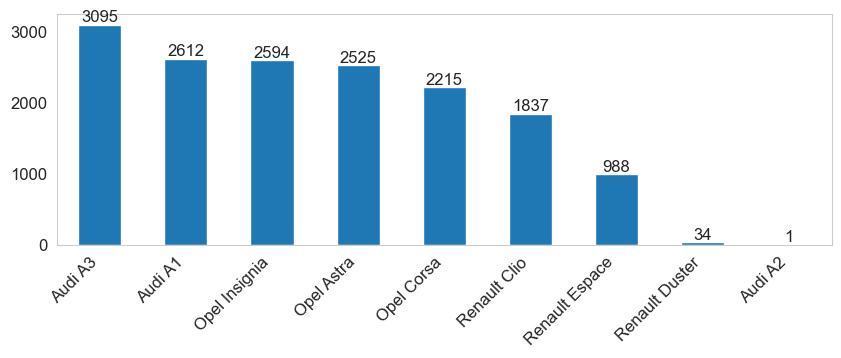

In [15]:
g = df.make_model.value_counts().plot.bar(figsize=(10,3))
g.bar_label(g.containers[0]);
plt.xticks(rotation=45, ha='right');

In [16]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,km,type,inspection_new,paint_type,nr_of_seats,gearing_type,displacement_cc,weight_kg,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kw,warranty_months,upholstery_type,cons_comb
2612,Audi A2,Off-Road,28200,26166.000000,Employee's car,1,Metallic,5.000000,Manual,1598.000000,1734.000000,front,Diesel (Particulate Filter),120.000000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",6.000000,1.000000,85.000000,12.000000,Cloth,4.900000


In [17]:
df.drop(index=df[df.make_model=="Audi A2"].index, inplace =True)

In [18]:
df.shape

(15900, 25)

### Feature Engineering - Numeric Column

In [19]:
numbers = df.select_dtypes("number").columns
df[numbers].describe().T

,count,mean,std,min,25%,50%,75%,max
price,15900.000000,18020.863648,7376.523902,4950.000000,12850.000000,16900.000000,21900.000000,74600.000000
km,15900.000000,32283.070660,36951.361972,0.000000,3337.916667,20710.000000,47000.000000,317000.000000
inspection_new,15900.000000,0.649057,0.477280,0.000000,0.000000,1.000000,1.000000,1.000000
nr_of_seats,15900.000000,4.958616,0.496846,2.000000,5.000000,5.000000,5.000000,7.000000
displacement_cc,15900.000000,1427.801541,276.785956,890.000000,1229.000000,1461.000000,1598.000000,2480.000000
weight_kg,15900.000000,1342.717987,204.645265,840.000000,1165.000000,1280.000000,1441.000000,2471.000000
co_2_emission,15900.000000,116.933648,16.762908,80.000000,104.000000,116.000000,128.000000,165.000000
gears,15900.000000,5.890943,0.718463,5.000000,5.000000,6.000000,6.000000,8.000000
age,15900.000000,1.414497,1.112981,0.000000,0.000000,1.000000,2.000000,3.000000
hp_kw,15900.000000,88.497421,26.650889,51.000000,66.000000,85.000000,101.500000,294.000000


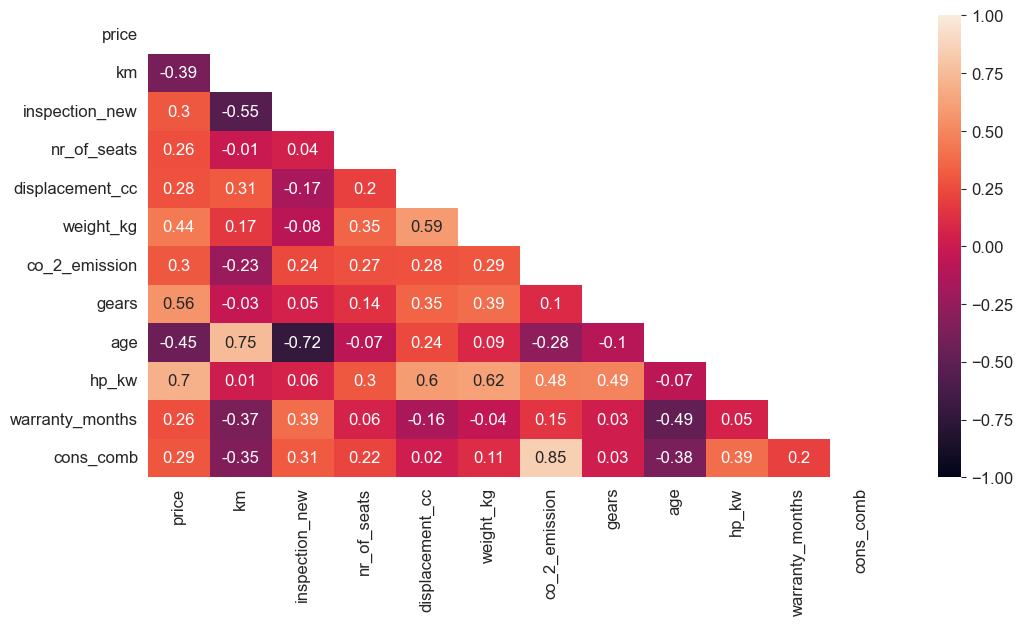

In [20]:
sns.heatmap(
    df.corr().round(2), 
    mask=np.triu(np.ones_like(df.corr(), dtype=bool)), 
    annot=True, vmin=-1, vmax=1
)
plt.show();

### `Multicolinarity` Check Colorized Correlation

In [21]:
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

False

In [22]:
def check_multicolinarity(data, upper=0.9):
    ''' data = numeric list like object or pd.Dataframe'''
    def color_red(val):
        color = ('red' if abs(val)>=upper and val<1 else 'black')
        return f'color: {color}'

    df = pd.DataFrame(data)
    df_corr = df.corr().applymap(lambda x: x if abs(x)>=upper and x<1 else np.NaN).dropna(how='all').dropna(how='all', axis=1)
    
    print(f'Multicolinarity Data', df_corr.shape)
    return df_corr.style.applymap(color_red)

check_multicolinarity(df, upper=0.7)

Multicolinarity Data (5, 5)


,km,inspection_new,co_2_emission,age,cons_comb
km,nan,nan,nan,0.747368,nan
inspection_new,nan,nan,nan,-0.716184,nan
co_2_emission,nan,nan,nan,nan,0.852951
age,0.747368,-0.716184,nan,nan,nan
cons_comb,nan,nan,0.852951,nan,nan


### Check Target Feature

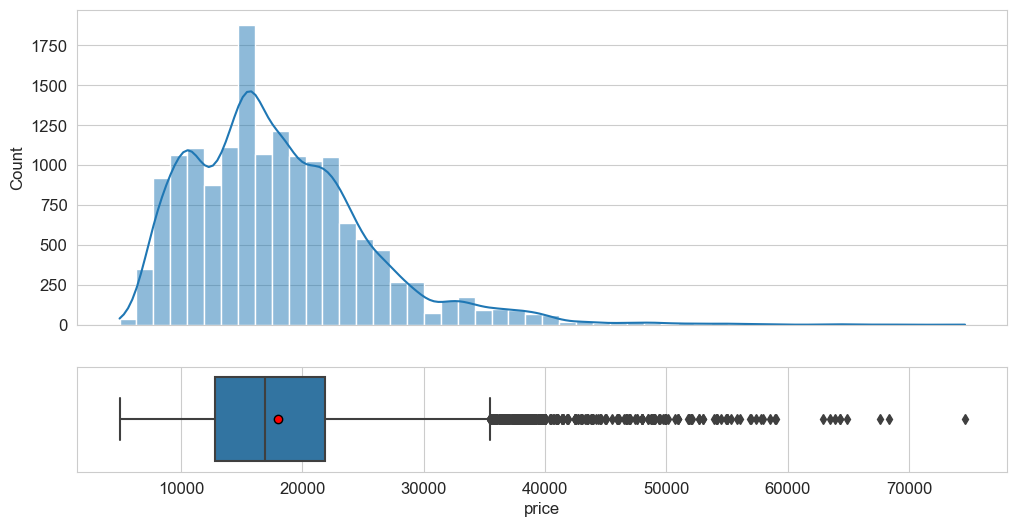

In [23]:
fig, (hist, box) = plt.subplots(nrows=2, sharex=True, gridspec_kw={'height_ratios': [3, 1]})
sns.histplot(df['price'], bins=50, kde=True, ax=hist).grid(axis='y')
sns.boxplot(df.price, ax=box).grid(axis='x')

In [24]:
df.groupby('make_model')[['price']].describe().T

make_model       Audi A1      Audi A3   Opel Astra   Opel Corsa  \
price count  2612.000000  3095.000000  2525.000000  2215.000000   
      mean  18865.125191 20996.271082 15840.834059 11059.330023   
      std    4505.070786  5023.479072  4943.467724  2962.396111   
      min    8999.000000  5555.000000  6000.000000  4950.000000   
      25%   15550.000000 17900.000000 12399.000000  8690.000000   
      50%   17890.000000 20900.000000 15290.000000 10500.000000   
      75%   21900.000000 23500.000000 17990.000000 13495.000000   
      max   37900.000000 74600.000000 39433.000000 18622.000000   

make_model   Opel Insignia  Renault Clio  Renault Duster  Renault Espace  
price count    2594.000000   1837.000000       34.000000      988.000000  
      mean    21468.445644  11944.071856    13230.176471    30058.512146  
      std      7711.857823   4204.269365     1622.404678     8714.716619  
      min      8290.000000   5445.000000    10850.000000    12614.000000  
      25%     15622.250000   9150.000000    11925.000000    23900.000000  
      50%     19990.000000  10660.000000    13189.000000    28900.000000  
      75%     24450.000000  13995.000000    14399.000000    34956.250000  
      max     52120.000000  31500.000000    16033.000000    68320.000000

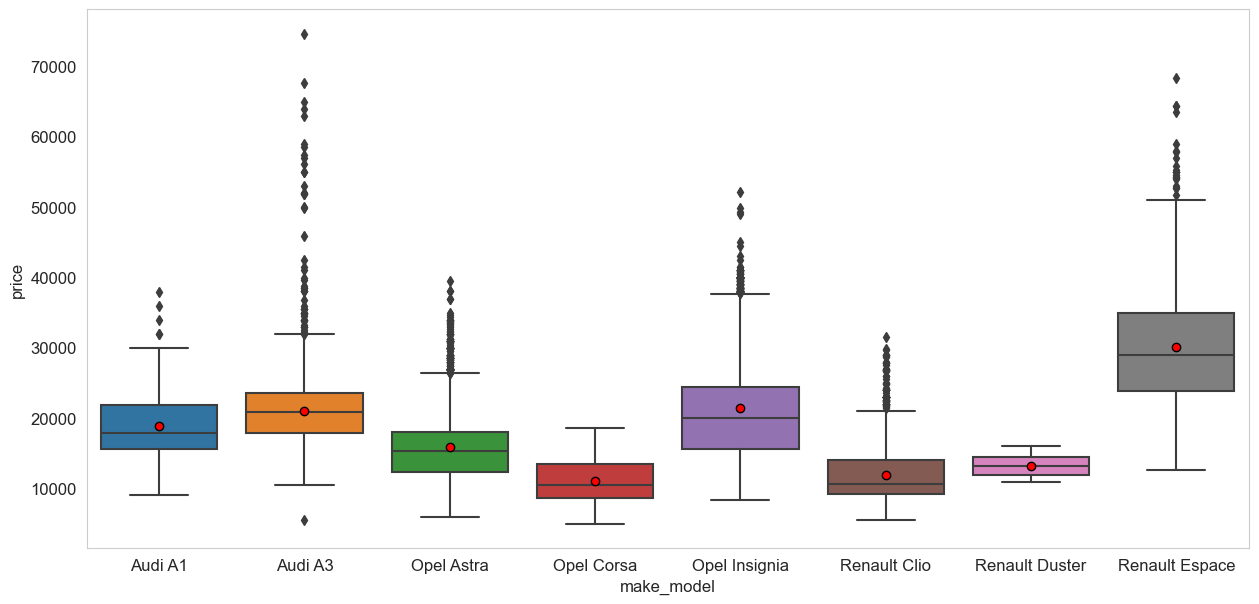

In [25]:
plt.figure(figsize=(15,7))
sns.boxplot(x="make_model", y="price", data=df, whis=1.5)
plt.show()

### Check Count Outliers

In [26]:
df[df["make_model"]== "Audi A1"]["price"].sort_values()

25      8999
61      9950
63     10000
62     10300
64     10490
       ...  
709    31990
706    32000
732    33900
731    35900
712    37900
Name: price, Length: 2612, dtype: int64

In [27]:
total_outliers = []

for model in df["make_model"].unique():
    
    car_prices = df[df["make_model"]==model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()    
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

 The count of outlier for Audi A1         : 5    ,           The rate of outliers : 0.002
 The count of outlier for Audi A3         : 54   ,           The rate of outliers : 0.017
 The count of outlier for Opel Astra      : 134  ,           The rate of outliers : 0.053
 The count of outlier for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel Insignia   : 114  ,           The rate of outliers : 0.044
 The count of outlier for Renault Clio    : 90   ,           The rate of outliers : 0.049
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 22   ,           The rate of outliers : 0.022

Total_outliers :  419 The rate of total outliers : 0.026


# 2. Data Pre-Processing

## Import Libraries

In [28]:
# conda install -c anaconda scikit-learn
# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

# Supervised-Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
# Supervised-Regression-metrics
# import sklearn sklearn.metrics.SCORERS.keys()
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Supervised-Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
# conda install -c conda-forge xgboost
from xgboost import XGBClassifier
# Supervised-Classifier-metrics
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score

# Supervised-cross_validate-GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# UnSupervised
from sklearn.cluster import KMeans
# import sklearn sklearn.metrics.SCORERS.keys()
from pyclustertend import hopkins
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

import pickle
random_state = 101

In [29]:
# conda install -c districtdatalabs yellowbrick
# yellowbrick library for visualizing the model performance
from yellowbrick.features import RadViz
from yellowbrick.model_selection import CVScores
from yellowbrick.model_selection import FeatureImportances

# Supervised-Regression
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError

# Supervised-Classifier
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve

# UnSupervised-Cluster
from yellowbrick.cluster import KElbowVisualizer 

# !pip install scikit-plot
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

## Features and Target variable Split
* Splitting the dataset into X(independent variables) and y (dependent variable)

In [30]:
X = df.drop(columns='price')
y = df['price']

## Train | Test Split
- Split the data into training and testing sets
- get_dummies for X_train and X_test - for data separated by ','
- OneHotEncoder for X_train and X_test

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

### `get_dummies` for X_train and X_test - for data separated by ','
- if data separated by ',', we will get dummy.

In [32]:
from sklearn.model_selection import train_test_split

def trans_1(X, y, test_size=0.2, random_state=random_state):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    X_train = X_train.join(X_train["comfort_convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
    X_train = X_train.join(X_train["entertainment_media"].str.get_dummies(sep = ",").add_prefix("em_"))
    X_train = X_train.join(X_train["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
    X_train = X_train.join(X_train["safety_security"].str.get_dummies(sep = ",").add_prefix("ss_"))
    
    
    X_test = X_test.join(X_test["comfort_convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
    X_test = X_test.join(X_test["entertainment_media"].str.get_dummies(sep = ",").add_prefix("em_"))
    X_test = X_test.join(X_test["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
    X_test = X_test.join(X_test["safety_security"].str.get_dummies(sep = ",").add_prefix("ss_"))
    
    X_test = X_test.reindex(columns = X_train.columns, fill_value=0) # "0"
    
    
    X_train.drop(columns=["comfort_convenience","entertainment_media","extras","safety_security"], inplace = True)
    X_test.drop(columns=["comfort_convenience","entertainment_media","extras","safety_security"], inplace = True)
    
    
    return X_train, X_test, y_train, y_test

In [33]:
def trans_1_get_dummies(X_train, X_test=None, contain=','):
    
    objects = X_train.select_dtypes(include="O").columns
    dummy_col = [col for col in objects if X_train[col].str.contains(contain, regex=True).any()]
    prefix = [i[0]+i.split('_')[1][0]+'_' if '_' in i else i[:2]+'_' for i in dummy_col]
    
    for col, pre in zip(dummy_col, prefix):
        X_train = X_train.join(X_train[col].str.get_dummies(sep=contain).add_prefix(pre))
        if X_test is not None:
            X_test = X_test.join(X_test[col].str.get_dummies(sep=contain).add_prefix(pre))    
    
    if X_test is not None:
        X_test = X_test.reindex(columns=X_train.columns, fill_value=0) # "0"
        X_test.drop(columns=dummy_col, inplace=True)   
    
    X_train.drop(columns=dummy_col, inplace=True)    
    
    # ternary operation: [false_value, true_value][conditional_expression]
    return (X_train, (X_train, X_test))[X_test is not None]

In [34]:
# check high nunique data separated by ','
X_train.select_dtypes(include ="O").nunique()

make_model                8
body_type                 8
type                      5
paint_type                3
gearing_type              3
drive_chain               3
fuel                      6
emission_class            6
comfort_convenience    5252
entertainment_media     330
extras                  605
safety_security        3786
upholstery_type           6
dtype: int64

In [35]:
# get_dummies apply for comma(',') separated data in columns

X_train_dummy, X_test_dummy = trans_1_get_dummies(X_train, X_test, contain=',')

In [36]:
# get_dummies applied for comma(',') separated data in columns
X_train_dummy.select_dtypes('O').nunique()

make_model         8
body_type          8
type               5
paint_type         3
gearing_type       3
drive_chain        3
fuel               6
emission_class     6
upholstery_type    6
dtype: int64

### `OneHotEncoder` for X_train and X_test

In [37]:
from sklearn.preprocessing import OneHotEncoder

def trans_2(X_train, X_test):
    
    cat = X_train.select_dtypes("object").columns
    cat = list(cat)
    
    enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
    X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index, 
                           columns = enc.get_feature_names_out(cat))
    
    X_test_cat  = pd.DataFrame(enc.transform(X_test[cat]), index = X_test.index, 
                               columns = enc.get_feature_names_out(cat))
    
    X_train = X_train_cat.join(X_train.select_dtypes("number"))
    X_test = X_test_cat.join(X_test.select_dtypes("number"))
    
    return X_train, X_test

In [38]:
from sklearn.preprocessing import OneHotEncoder

def trans_2_OneHotEncoder(X_train, X_test):
    
    cat = X_train.select_dtypes("object").columns.to_list()    
    enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
    X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), 
                    index = X_train.index, 
                    columns = enc.get_feature_names_out(cat))    
    X_test_cat  = pd.DataFrame(enc.transform(X_test[cat]), 
                    index = X_test.index, 
                    columns = enc.get_feature_names_out(cat))
    
    X_train = X_train_cat.join(X_train.select_dtypes("number"))
    X_test = X_test_cat.join(X_test.select_dtypes("number"))
        
    return X_train, X_test

In [39]:
X_train_enc, X_test_enc = trans_2_OneHotEncoder(X_train_dummy, X_test_dummy)

In [40]:
X_train_enc.shape, X_test_enc.shape

((12720, 153), (3180, 153))

In [41]:
X_train_enc.describe().T

,count,mean,std,min,25%,50%,75%,max
make_model_Audi A1,12720.000000,0.164387,0.370641,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Audi A3,12720.000000,0.193553,0.395098,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Astra,12720.000000,0.159355,0.366022,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Corsa,12720.000000,0.139780,0.346772,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Insignia,12720.000000,0.161950,0.368419,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
ss_Side airbag,12720.000000,0.880818,0.324016,0.000000,1.000000,1.000000,1.000000,1.000000
ss_Tire pressure monitoring system,12720.000000,0.704638,0.456223,0.000000,0.000000,1.000000,1.000000,1.000000
ss_Traction control,12720.000000,0.725943,0.446055,0.000000,0.000000,1.000000,1.000000,1.000000
ss_Traffic sign recognition,12720.000000,0.132311,0.338842,0.000000,0.000000,0.000000,0.000000,1.000000


In [42]:
# X_test_enc.describe().T

## Scaling the Data
* import StandardScaler and scale the data. Use fit_transform() on the training set and transform() on the testing set to prevent data leakage.

In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler() 

# Use train - calc mean and sd
scaler.fit(X_train_enc)

# Use scaler calc scaled data
# if you don't use pipeline, you can use scaled data directly
X_train_scaled = scaler.transform(X_train_enc) 
X_test_scaled  = scaler.transform(X_test_enc)

In [44]:
# check X_train_scaled
pd.DataFrame(X_train_scaled, columns=X_train_enc.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
make_model_Audi A1,12720.000000,0.164387,0.370641,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Audi A3,12720.000000,0.193553,0.395098,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Astra,12720.000000,0.159355,0.366022,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Corsa,12720.000000,0.139780,0.346772,0.000000,0.000000,0.000000,0.000000,1.000000
make_model_Opel Insignia,12720.000000,0.161950,0.368419,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
ss_Side airbag,12720.000000,0.880818,0.324016,0.000000,1.000000,1.000000,1.000000,1.000000
ss_Tire pressure monitoring system,12720.000000,0.704638,0.456223,0.000000,0.000000,1.000000,1.000000,1.000000
ss_Traction control,12720.000000,0.725943,0.446055,0.000000,0.000000,1.000000,1.000000,1.000000
ss_Traffic sign recognition,12720.000000,0.132311,0.338842,0.000000,0.000000,0.000000,0.000000,1.000000


In [45]:
# check X_test_scaled
# pd.DataFrame(X_test_scaled, columns=X_test_enc.columns).describe().T

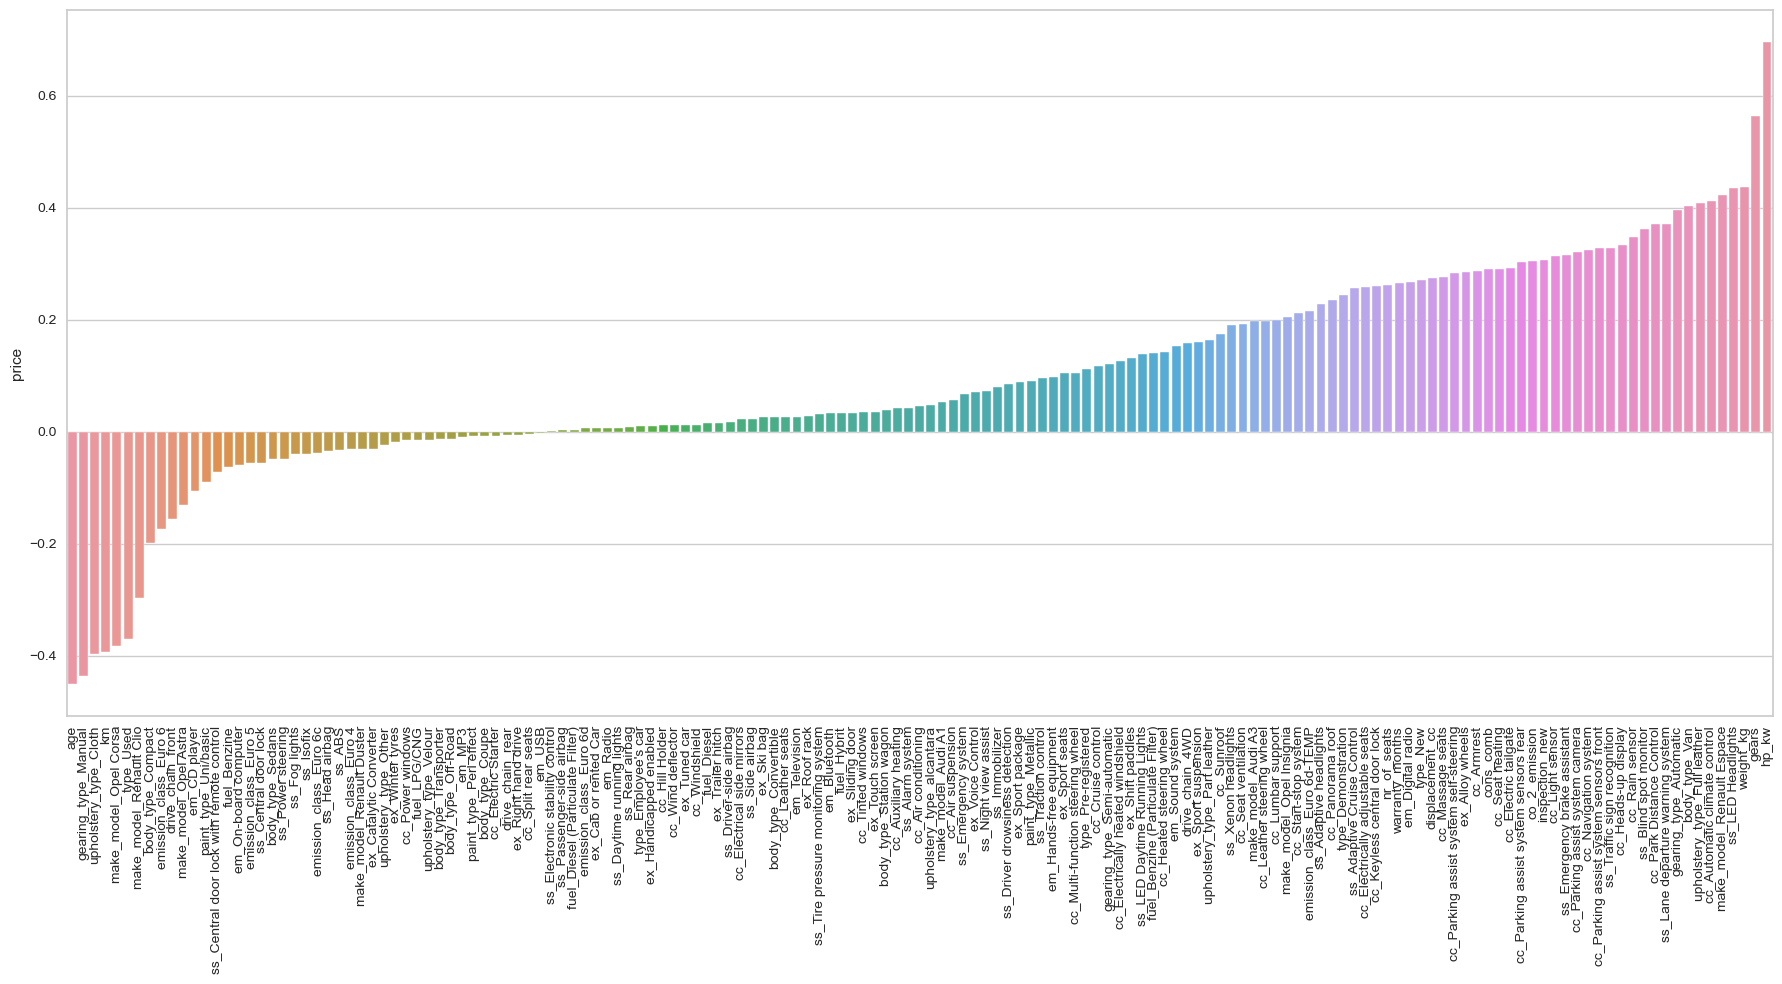

In [46]:
corr_by_price = X_train_enc.join(y_train).corr()["price"].sort_values()[:-1]

plt.figure(figsize=(18,10))
sns.barplot(x=corr_by_price.index, y=corr_by_price)

plt.xticks(rotation=90)
plt.tight_layout();

## make_column_transformer

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin

class GetDummies(BaseEstimator, TransformerMixin) : 
    def __init__(self, separator=',') : 
        """
        separator=',': GetDummies for comma seperated colums Data
        """
        self.separator = separator
        
    # Return self nothing else to do here
    def fit(self, X, y=None) : 
        self.objects = X.select_dtypes(include="O").columns
        self.dummy_col = [col for col in self.objects if X[col].str.contains(self.separator, regex=True).any()]
        self.prefix = [i[0]+i.split('_')[1][0]+'_' if '_' in i else i[:2]+'_' for i in self.dummy_col]
        
        for col, pre in zip(self.dummy_col, self.prefix):
            X = X.join(X[col].str.get_dummies(sep=self.separator).add_prefix(pre))
            
        X.drop(columns=self.dummy_col, inplace=True)
        self.columns = X.columns
        return self
    
    # Transformer method we wrote for this transformer
    def transform(self, X, y=None) :

        for col, pre in zip(self.dummy_col, self.prefix):
            X = X.join(X[col].str.get_dummies(sep=self.separator).add_prefix(pre))   

        X = X.reindex(columns=self.columns, fill_value=0)          
        return X
        
    # to get feature names
    def get_feature_names_out(self, X, y=None):
        return self.columns

In [48]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline

# for logarithmic transformation or MinMaxScaler... etc.
log_transform = FunctionTransformer(func=lambda x: np.log(x + 1), feature_names_out='one-to-one', validate=True)

cat_dummy = ["comfort_convenience", "entertainment_media", "extras", "safety_security"]
cat_ohe = X_train.select_dtypes(include='O').drop(columns=cat_dummy).columns.to_list()

column_trans = make_column_transformer(
    (GetDummies(), cat_dummy), 
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_ohe),
    remainder = MinMaxScaler()
)

In [49]:
pd.DataFrame(column_trans.fit_transform(X_train), columns=column_trans.get_feature_names_out())

,getdummies__cc_Air conditioning,getdummies__cc_Air suspension,getdummies__cc_Armrest,getdummies__cc_Automatic climate control,getdummies__cc_Auxiliary heating,getdummies__cc_Cruise control,getdummies__cc_Electric Starter,getdummies__cc_Electric tailgate,getdummies__cc_Electrical side mirrors,getdummies__cc_Electrically adjustable seats,getdummies__cc_Electrically heated windshield,getdummies__cc_Heads-up display,getdummies__cc_Heated steering wheel,getdummies__cc_Hill Holder,getdummies__cc_Keyless central door lock,getdummies__cc_Leather seats,getdummies__cc_Leather steering wheel,getdummies__cc_Light sensor,getdummies__cc_Lumbar support,getdummies__cc_Massage seats,getdummies__cc_Multi-function steering wheel,getdummies__cc_Navigation system,getdummies__cc_Panorama roof,getdummies__cc_Park Distance Control,getdummies__cc_Parking assist system camera,getdummies__cc_Parking assist system self-steering,getdummies__cc_Parking assist system sensors front,getdummies__cc_Parking assist system sensors rear,getdummies__cc_Power windows,getdummies__cc_Rain sensor,getdummies__cc_Seat heating,getdummies__cc_Seat ventilation,getdummies__cc_Split rear seats,getdummies__cc_Start-stop system,getdummies__cc_Sunroof,getdummies__cc_Tinted windows,getdummies__cc_Wind deflector,getdummies__cc_Windshield,getdummies__em_Bluetooth,getdummies__em_CD player,getdummies__em_Digital radio,getdummies__em_Hands-free equipment,getdummies__em_MP3,getdummies__em_On-board computer,getdummies__em_Radio,getdummies__em_Sound system,getdummies__em_Television,getdummies__em_USB,getdummies__ex_Alloy wheels,getdummies__ex_Cab or rented Car,getdummies__ex_Catalytic Converter,getdummies__ex_Handicapped enabled,getdummies__ex_Right hand drive,getdummies__ex_Roof rack,getdummies__ex_Shift paddles,getdummies__ex_Ski bag,getdummies__ex_Sliding door,getdummies__ex_Sport package,getdummies__ex_Sport seats,getdummies__ex_Sport suspension,getdummies__ex_Touch screen,getdummies__ex_Trailer hitch,getdummies__ex_Tuned car,getdummies__ex_Voice Control,getdummies__ex_Winter tyres,getdummies__ss_ABS,getdummies__ss_Adaptive Cruise Control,getdummies__ss_Adaptive headlights,getdummies__ss_Alarm system,getdummies__ss_Blind spot monitor,getdummies__ss_Central door lock,getdummies__ss_Central door lock with remote control,getdummies__ss_Daytime running lights,getdummies__ss_Driver drowsiness detection,getdummies__ss_Driver-side airbag,getdummies__ss_Electronic stability control,getdummies__ss_Emergency brake assistant,getdummies__ss_Emergency system,getdummies__ss_Fog lights,getdummies__ss_Head airbag,getdummies__ss_Immobilizer,getdummies__ss_Isofix,getdummies__ss_LED Daytime Running Lights,getdummies__ss_LED Headlights,getdummies__ss_Lane departure warning system,getdummies__ss_Night view assist,getdummies__ss_Passenger-side airbag,getdummies__ss_Power steering,getdummies__ss_Rear airbag,getdummies__ss_Side airbag,getdummies__ss_Tire pressure monitoring system,getdummies__ss_Traction control,getdummies__ss_Traffic sign recognition,getdummies__ss_Xenon headlights,onehotencoder__make_model_Audi A1,onehotencoder__make_model_Audi A3,onehotencoder__make_model_Opel Astra,onehotencoder__make_model_Opel Corsa,onehotencoder__make_model_Opel Insignia,onehotencoder__make_model_Renault Clio,onehotencoder__make_model_Renault Duster,onehotencoder__make_model_Renault Espace,onehotencoder__body_type_Compact,onehotencoder__body_type_Convertible,onehotencoder__body_type_Coupe,onehotencoder__body_type_Off-Road,onehotencoder__body_type_Sedans,onehotencoder__body_type_Station wagon,onehotencoder__body_type_Transporter,onehotencoder__body_type_Van,onehotencoder__type_Demonstration,onehotencoder__type_Employee's car,onehotencoder__type_New,onehotencoder__type_Pre-registered,onehotencoder__type_Used,onehotencoder__paint_type_Metallic,onehotencoder__paint_type_Perl effect,onehotencoder__paint_type_Uni/basic,onehotencoder__gearing_type_Automatic,onehotencoder__gearing_type_Manual,onehotencoder__gearing_type_Sem

In [50]:
pd.DataFrame(column_trans.fit_transform(X_train), columns=column_trans.get_feature_names_out()).describe()

,getdummies__cc_Air conditioning,getdummies__cc_Air suspension,getdummies__cc_Armrest,getdummies__cc_Automatic climate control,getdummies__cc_Auxiliary heating,getdummies__cc_Cruise control,getdummies__cc_Electric Starter,getdummies__cc_Electric tailgate,getdummies__cc_Electrical side mirrors,getdummies__cc_Electrically adjustable seats,getdummies__cc_Electrically heated windshield,getdummies__cc_Heads-up display,getdummies__cc_Heated steering wheel,getdummies__cc_Hill Holder,getdummies__cc_Keyless central door lock,getdummies__cc_Leather seats,getdummies__cc_Leather steering wheel,getdummies__cc_Light sensor,getdummies__cc_Lumbar support,getdummies__cc_Massage seats,getdummies__cc_Multi-function steering wheel,getdummies__cc_Navigation system,getdummies__cc_Panorama roof,getdummies__cc_Park Distance Control,getdummies__cc_Parking assist system camera,getdummies__cc_Parking assist system self-steering,getdummies__cc_Parking assist system sensors front,getdummies__cc_Parking assist system sensors rear,getdummies__cc_Power windows,getdummies__cc_Rain sensor,getdummies__cc_Seat heating,getdummies__cc_Seat ventilation,getdummies__cc_Split rear seats,getdummies__cc_Start-stop system,getdummies__cc_Sunroof,getdummies__cc_Tinted windows,getdummies__cc_Wind deflector,getdummies__cc_Windshield,getdummies__em_Bluetooth,getdummies__em_CD player,getdummies__em_Digital radio,getdummies__em_Hands-free equipment,getdummies__em_MP3,getdummies__em_On-board computer,getdummies__em_Radio,getdummies__em_Sound system,getdummies__em_Television,getdummies__em_USB,getdummies__ex_Alloy wheels,getdummies__ex_Cab or rented Car,getdummies__ex_Catalytic Converter,getdummies__ex_Handicapped enabled,getdummies__ex_Right hand drive,getdummies__ex_Roof rack,getdummies__ex_Shift paddles,getdummies__ex_Ski bag,getdummies__ex_Sliding door,getdummies__ex_Sport package,getdummies__ex_Sport seats,getdummies__ex_Sport suspension,getdummies__ex_Touch screen,getdummies__ex_Trailer hitch,getdummies__ex_Tuned car,getdummies__ex_Voice Control,getdummies__ex_Winter tyres,getdummies__ss_ABS,getdummies__ss_Adaptive Cruise Control,getdummies__ss_Adaptive headlights,getdummies__ss_Alarm system,getdummies__ss_Blind spot monitor,getdummies__ss_Central door lock,getdummies__ss_Central door lock with remote control,getdummies__ss_Daytime running lights,getdummies__ss_Driver drowsiness detection,getdummies__ss_Driver-side airbag,getdummies__ss_Electronic stability control,getdummies__ss_Emergency brake assistant,getdummies__ss_Emergency system,getdummies__ss_Fog lights,getdummies__ss_Head airbag,getdummies__ss_Immobilizer,getdummies__ss_Isofix,getdummies__ss_LED Daytime Running Lights,getdummies__ss_LED Headlights,getdummies__ss_Lane departure warning system,getdummies__ss_Night view assist,getdummies__ss_Passenger-side airbag,getdummies__ss_Power steering,getdummies__ss_Rear airbag,getdummies__ss_Side airbag,getdummies__ss_Tire pressure monitoring system,getdummies__ss_Traction control,getdummies__ss_Traffic sign recognition,getdummies__ss_Xenon headlights,onehotencoder__make_model_Audi A1,onehotencoder__make_model_Audi A3,onehotencoder__make_model_Opel Astra,onehotencoder__make_model_Opel Corsa,onehotencoder__make_model_Opel Insignia,onehotencoder__make_model_Renault Clio,onehotencoder__make_model_Renault Duster,onehotencoder__make_model_Renault Espace,onehotencoder__body_type_Compact,onehotencoder__body_type_Convertible,onehotencoder__body_type_Coupe,onehotencoder__body_type_Off-Road,onehotencoder__body_type_Sedans,onehotencoder__body_type_Station wagon,onehotencoder__body_type_Transporter,onehotencoder__body_type_Van,onehotencoder__type_Demonstration,onehotencoder__type_Employee's car,onehotencoder__type_New,onehotencoder__type_Pre-registered,onehotencoder__type_Used,onehotencoder__paint_type_Metallic,onehotencoder__paint_type_Perl effect,onehotencoder__paint_type_Uni/basic,onehotencoder__gearing_type_Automatic,onehotencoder__gearing_type_Manual,onehotencoder__gearing_type_Sem

# 3. Implement `Linear` Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, name):
    
    scores = {
    name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
    }    
    return pd.DataFrame(scores)

# same train_val function
def eval_metric_regression(model, X_train, y_train, X_test, y_test, model_name=''):   
    
    y_pred_test = model.predict(X_test) 
    y_pred_train = model.predict(X_train)  
    
    train = pd.Series({
        "R2"   : r2_score(y_train, y_pred_train),
        "MAE"  : mean_absolute_error(y_train, y_pred_train),
        "MSE"  : mean_squared_error(y_train, y_pred_train),                          
        "RMSE" : np.sqrt(mean_squared_error(y_train, y_pred_train)),   
    }).to_frame(model_name+"_train")

    test = pd.DataFrame.from_dict({
        "R2"   : r2_score(y_test, y_pred_test),
        "MAE"  : mean_absolute_error(y_test, y_pred_test),
        "MSE"  : mean_squared_error(y_test, y_pred_test),
        "RMSE" : np.sqrt(mean_squared_error(y_test, y_pred_test)),
    }, orient='index', columns=[model_name+"_test"])
    
    # join (left join by default)         #     scores2 = train.join(test)
    # concat (outer join by default)      #     scores3 = pd.concat([train, test], axis=1)
    # append not recommended - use concat #     scores4 = train.append(test)
    # merge (inner join by default)
    scores1 = pd.merge(train, test, left_index=True, right_index=True)
    
    # convert MultiIndex
    cols = scores1.columns.str.extract(r'(.+)_(.+)', expand=True)
    scores1.columns = pd.MultiIndex.from_arrays((cols[0], cols[0]+'_'+cols[1]))
    
    return scores1

## Linear Model Fitting and Predicting `with Scale and with Pipeline`

In [52]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() 

# pipeline for Linear Regression
pipe_lin = Pipeline([
    ("transformer", column_trans),
    ("lin_reg", lin_reg)
])
pipe_lin.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('getdummies', GetDummies(),
                                                  ['comfort_convenience',
                                                   'entertainment_media',
                                                   'extras',
                                                   'safety_security']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'type', 'paint_type',
                                                   'gearing_type',
                                                   'drive_chain', 'fuel',
                                                   'emission_class',
                                                   'upholstery_type'])])),
                ('lin_reg', LinearRegression())])

### Evaluation-Error Metric Check R^2 Score
* Evaluate the model if it is appropriate to linear regression,to do so use residuals and R-squared.

In [53]:
# Evaluate the result. Overfitting?
ls = eval_metric_regression(pipe_lin, X_train, y_train, X_test, y_test, "linear")
ls

0            linear               
       linear_train    linear_test
R2         0.890419       0.891141
MAE     1708.896418    1707.450637
MSE  5966419.049891 5906469.084308
RMSE    2442.625442    2430.322835

### Adjusted R2 Score

In [54]:
def adj_r2(y_test, y_pred_test, X):
    r2 = r2_score(y_test, y_pred_test)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [55]:
y_pred_adj = pipe_lin.predict(X_test)
adj_r2(y_test, y_pred_adj, X)

0.8909766204639469

### Cross Validate Model

In [56]:
# from sklearn.metrics import SCORERS
# SCORERS.keys()

In [57]:
from sklearn.model_selection import cross_validate, cross_val_score

lin_reg = LinearRegression() 

model = Pipeline([
    ("transformer", column_trans),
    ("lin_reg", lin_reg)
])

# cross_validate with empty model - fit and predict 
# Check not Scaled X_train or Scaled X_train_scaled
scores = cross_validate(
    model, X_train, y_train, 
    scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', 'neg_root_mean_squared_error'], 
    return_train_score=True,
    cv = 5
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.iloc[:, 2:].mean()

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,1.286390,0.207579,0.874151,0.893116,-1773.003734,-1703.427329,-6551715.733540,-5882995.911532,-2559.631953,-2425.488798
1,1.370122,0.186916,0.893711,0.888981,-1695.700115,-1714.256111,-5907462.181547,-6013200.398179,-2430.527141,-2452.182782
2,1.362173,0.220750,0.889799,0.889901,-1739.460299,-1698.975531,-6529149.569575,-5861328.323015,-2555.220063,-2421.018034
3,1.396922,0.179640,0.882218,0.891862,-1722.048447,-1707.696823,-6243879.220583,-5926553.915873,-2498.775544,-2434.451461
4,1.366385,0.210089,0.887127,0.890679,-1745.818642,-1711.976802,-5901646.623707,-6011315.983983,-2429.330489,-2451.798520


test_r2                                    0.885401
train_r2                                   0.890908
test_neg_mean_absolute_error           -1735.206248
train_neg_mean_absolute_error          -1707.266519
test_neg_mean_squared_error         -6226770.665791
train_neg_mean_squared_error        -5939078.906516
test_neg_root_mean_squared_error       -2494.697038
train_neg_root_mean_squared_error      -2436.987919
dtype: float64

#### Train Residual Mean check percent - Cross Validation RMSE

In [58]:
def check_cv_rmse_mean_div_target(train_rmse_mean, cv_rmse_mean, y=y, df=df):
    return pd.DataFrame.from_dict({
        "train RMSE percent(%)": train_rmse_mean/y.mean(),
        "CV RMSE percent(%)"   : cv_rmse_mean/y.mean()}
        , orient='index', columns=['RMSE/target(label)_percent(%)'])

In [59]:
check_cv_rmse_mean_div_target(
    np.sqrt(mean_squared_error(y_train, pipe_lin.predict(X_train))), 
    df_scores['test_neg_root_mean_squared_error'].mean()) 

,RMSE/target(label)_percent(%)
train RMSE percent(%),0.135544
CV RMSE percent(%),-0.138434


### Coefficient - Slope Calculate 

In [60]:
def get_coeff_intercept(coeff, intercept, model_name='', columns=X_train.columns):
    coefficients = pd.DataFrame(coeff, columns = [f'Coefficient_{model_name}'], index=columns)
    intercept    = pd.DataFrame({f'Coefficient_{model_name}': intercept}, index=['intercept'])
    return pd.concat([coefficients, intercept])

In [61]:
# Calc Slope
lm_df = get_coeff_intercept(
    pipe_lin["lin_reg"].coef_, 
    pipe_lin["lin_reg"].intercept_, 
    model_name='linear', 
    columns=pipe_lin[:-1].get_feature_names_out()
)
lm_df

,Coefficient_linear
getdummies__cc_Air conditioning,544.673868
getdummies__cc_Air suspension,-178.140781
getdummies__cc_Armrest,49.784697
getdummies__cc_Automatic climate control,280.937850
getdummies__cc_Auxiliary heating,-2.938253
...,...
remainder__age,-4057.637269
remainder__hp_kw,21799.201423
remainder__warranty_months,741.734010
remainder__cons_comb,4538.623597


### **Result:________**

- R2 score is high but
- R2 and RMSE check cross validation not not suitable all time, because of dummy column count

## Calculate Residuals & Visually Compare Residuals

Why do we use the least squares error method to find the regression line that best fits the data?

In [62]:
y_pred_test  = pipe_lin.predict(X_test)
y_pred_train = pipe_lin.predict(X_train)

In [63]:
def check_pred_data_describe(y_pred_test, y_pred_train):
    test  = pd.DataFrame(y_pred_test, columns=['y_pred_test']).describe().T
    train = pd.DataFrame(y_pred_train, columns=['y_pred_train']).describe().T
    return pd.concat([test, train])

In [64]:
# pred data
check_pred_data_describe(y_pred_test, y_pred_train)

,count,mean,std,min,25%,50%,75%,max
y_pred_test,3180.000000,18028.183577,6867.333689,1388.353516,13363.033691,17628.100586,22394.610352,48266.041016
y_pred_train,12720.000000,18016.838751,6963.167504,-1966.033203,13189.810547,17522.829102,22346.813965,50252.322266


In [65]:
# actual data vs pred data cross check
pd.concat([y_test, y_train], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
price,3180.000000,18036.385220,7367.166432,5300.000000,12900.000000,16900.000000,21900.000000,67600.000000
price,12720.000000,18016.983255,7379.145645,4950.000000,12788.000000,16900.000000,21900.000000,74600.000000


In [66]:
df_comparing = pd.DataFrame({"Actual": y_test, "Prediction": y_pred_test, "Residual":y_test-y_pred_test})
df_comparing

,Actual,Prediction,Residual
227,16530,17858.216797,-1328.216797
8858,7950,5118.816406,2831.183594
2787,17600,18606.503906,-1006.503906
13024,23848,24103.703125,-255.703125
9171,8525,7519.265625,1005.734375
...,...,...,...
8961,7800,7080.441406,719.558594
7145,18450,18535.066406,-85.066406
7516,13400,14554.515625,-1154.515625
8687,7290,5629.441406,1660.558594


In [67]:
# check Residual
df_comparing.describe().T

,count,mean,std,min,25%,50%,75%,max
Actual,3180.000000,18036.385220,7367.166432,5300.000000,12900.000000,16900.000000,21900.000000,67600.000000
Prediction,3180.000000,18028.183577,6867.333689,1388.353516,13363.033691,17628.100586,22394.610352,48266.041016
Residual,3180.000000,8.201643,2430.691210,-14350.294922,-1311.143555,-105.641602,1157.534180,20750.521484


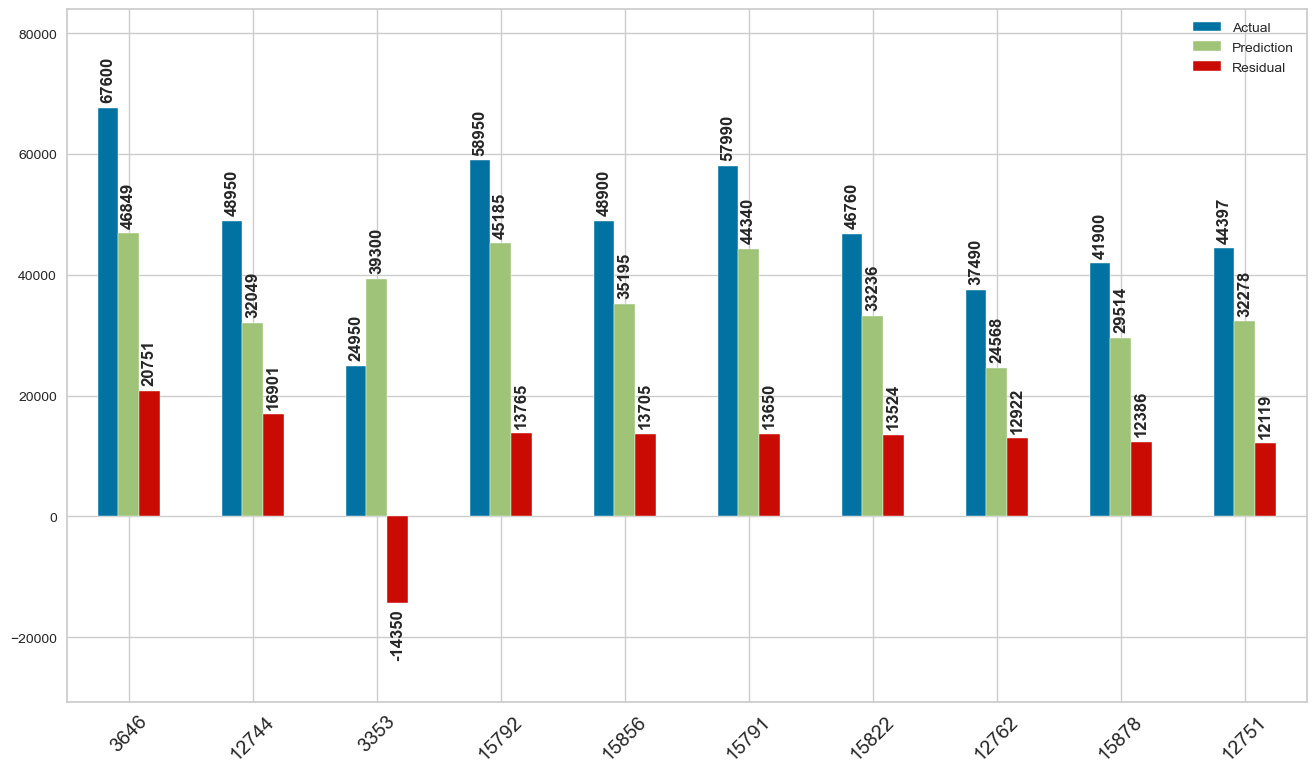

In [68]:
g = df_comparing.sort_values(by='Residual', key=abs, ascending=False).head(10).plot.bar(figsize=(16,9))

# annotate
for i in g.containers:
    g.bar_label(i, fmt='%.0f', fontsize=12, weight='bold', rotation=90, padding=4)

# pad the spacing between the number and the edge of the figure
g.margins(y=0.2) 

# tick_params(xaxis.set_tick_params) rotation or labelrotation
g.tick_params(axis='x', labelrotation=45, labelsize=14)

### Check index datas have `most Residual-Error`

In [69]:
# indexes which datas have most error
index = df_comparing.sort_values(by='Residual', key=abs, ascending=False).head().index

In [70]:
# check datas have most error
df.loc[index]

,make_model,body_type,price,km,type,inspection_new,paint_type,nr_of_seats,gearing_type,displacement_cc,weight_kg,drive_chain,fuel,co_2_emission,emission_class,comfort_convenience,entertainment_media,extras,safety_security,gears,age,hp_kw,warranty_months,upholstery_type,cons_comb
3646,Audi A3,Compact,67600,37747.000000,Used,0,Metallic,5.000000,Semi-automatic,2480.000000,1485.000000,4WD,Benzine,119.000000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","CD player,On-board computer,Radio","Alloy wheels,Roof rack,Sport seats,Sport suspe...","ABS,Alarm system,Central door lock,Driver-side...",7.000000,2.000000,294.000000,12.000000,Full leather,8.300000
12744,Opel Insignia,Sedans,48950,100.000000,New,1,Metallic,5.000000,Manual,1956.000000,1503.000000,4WD,Diesel (Particulate Filter),145.000000,Euro 6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,CD player,MP3,On-board computer,Radio","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Adaptive Cruise Control,Central door lock,...",6.000000,0.000000,125.000000,26.181818,Full leather,4.616667
3353,Audi A3,Compact,24950,57000.000000,Used,0,Metallic,5.000000,Semi-automatic,1400.000000,1280.000000,front,Hybrit,99.000000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Digital radio,Hands-free e...","Alloy wheels,Roof rack,Sport package,Sport sea...","ABS,Adaptive Cruise Control,Adaptive headlight...",6.000000,3.000000,150.000000,12.000000,Part leather,4.000000
15792,Renault Espace,Van,58950,1136.000000,Demonstration,1,Metallic,7.000000,Automatic,1798.000000,1624.000000,front,Benzine,152.000000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Hands-free equipment,Radio","Alloy wheels,Voice Control","ABS,Adaptive Cruise Control,Alarm system,Blind...",7.000000,0.000000,165.000000,41.600000,Full leather,6.800000
15856,Renault Espace,Van,48900,12.000000,Used,1,Metallic,5.000000,Automatic,1798.000000,1585.000000,front,Benzine,152.000000,Euro 6,"Air conditioning,Armrest,Automatic climate con...","On-board computer,Radio",Alloy wheels,"Central door lock,Driver-side airbag,Passenger...",7.000000,0.000000,165.000000,41.600000,Part leather,6.800000


### Check Residuals `Predicted Data` - ResidualsPlot

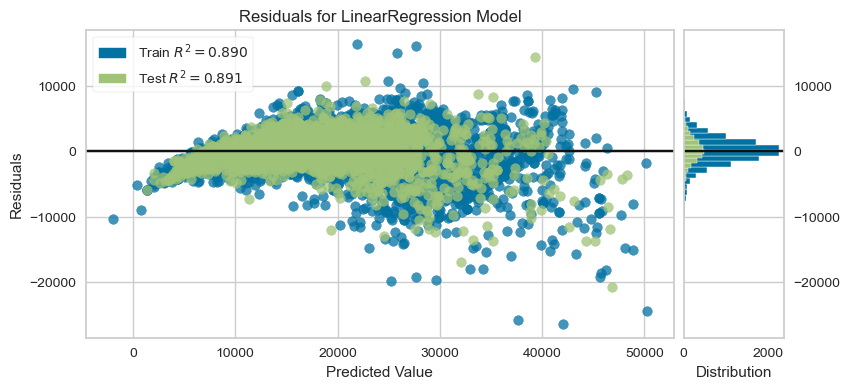

In [71]:
# Instantiate the linear model and visualizer
model = Pipeline([
    ("transformer", column_trans),
    ("lin_reg", lin_reg)
]).fit(X_train, y_train)

visualizer = RadViz(size=(900, 400))
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

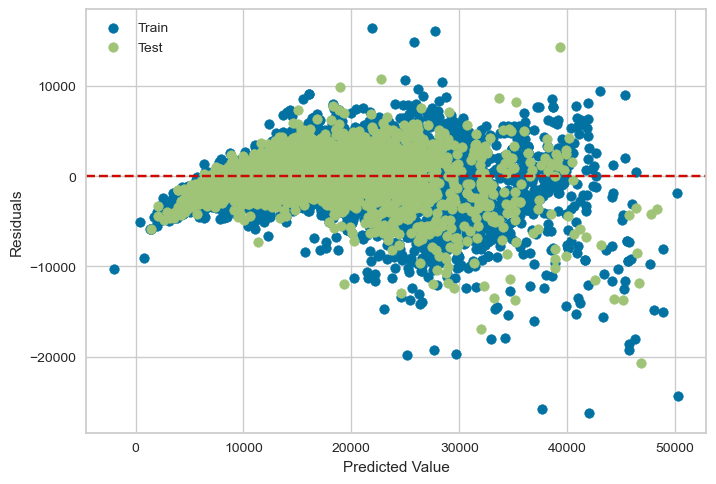

In [72]:
# Residuals scatterplot 
plt.scatter(x=y_pred_train, y=-(y_train-y_pred_train), c='b', label='Train') 
plt.scatter(x=y_pred_test, y=-(y_test-y_pred_test), c='g', label='Test') 

plt.axhline(y = 0, color ="r", linestyle = "--")
plt.xlabel('Predicted Value')
plt.ylabel('Residuals')
plt.legend(loc='upper left')

### Check Residuals `Actual Data` - Scatterplot

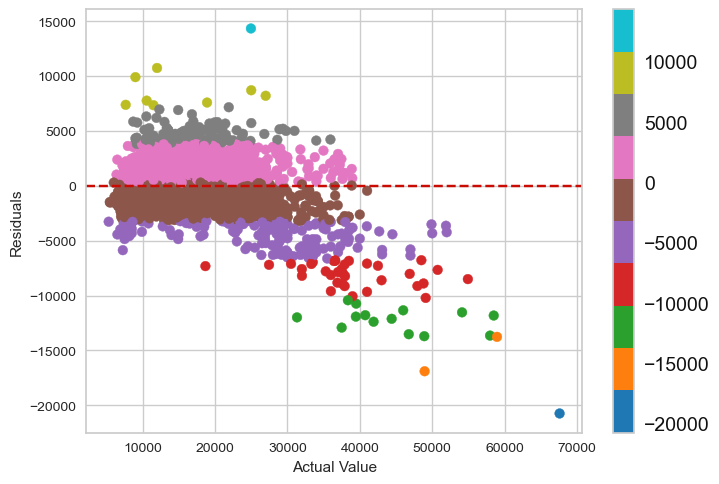

In [73]:
# Residuals scatterplot
plt.scatter(x=y_test, y=-(y_test-y_pred_test), c=-(y_test-y_pred_test), cmap= 'tab10') 
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.xlabel('Actual Value')
plt.ylabel('Residuals')

# colorbar tick_params
plt.colorbar().ax.tick_params(axis='both', labelsize=14, colors='k')

### Check Residuals - PredictionError

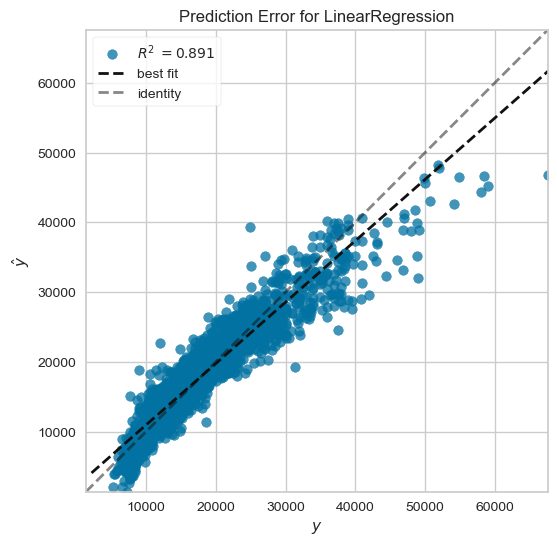

In [74]:
# Instantiate the linear model and visualizer
model = Pipeline([
    ("transformer", column_trans),
    ("lin_reg", lin_reg)
]).fit(X_train, y_train)

visualizer = RadViz(size=(600, 600))
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(); 

### Check Residuals - Probplot
- https://docs.scipy.org/doc/scipy/tutorial/stats/continuous.html
- https://docs.scipy.org/doc/scipy/tutorial/stats/discrete.html


- Quantiles  : Range from any value to any other value.
- Percentiles: Range from 0 to 100.
- Quartiles  : Range from 0 to 4.

In [75]:
# stats.probplot((y_test-y_pred_test), dist=stats.loggamma, sparams=(2.5,), plot=plt);
# plt.title("Probability Plot for loggamma dist with shape parameter 2.5");

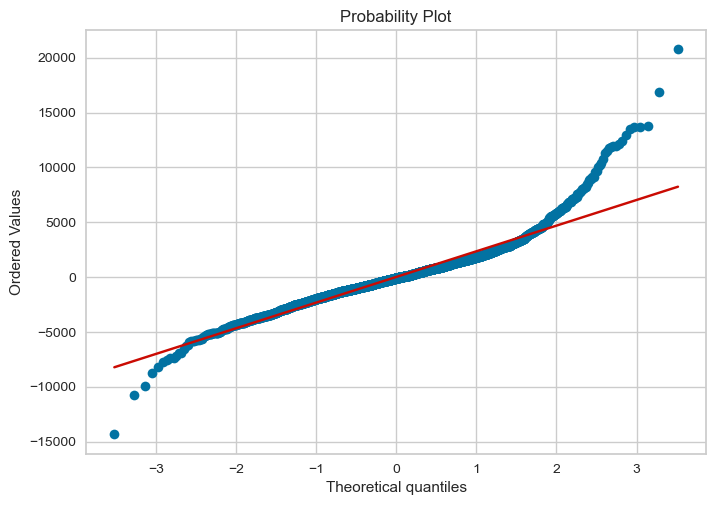

In [76]:
stats.probplot((y_test-y_pred_test), dist="norm", plot=plt);

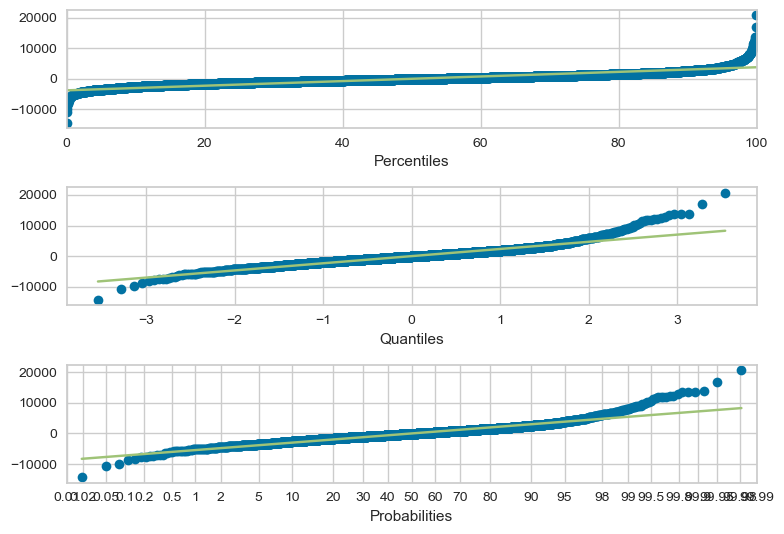

In [77]:
# conda install -c conda-forge mpl-probscale
import probscale

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3)

sample = (y_test-y_pred_test)

probscale.probplot(sample, ax=ax1, plottype='pp', bestfit=True, problabel='Percentiles')
probscale.probplot(sample, ax=ax2, plottype='qq', bestfit=True, problabel='Quantiles')
probscale.probplot(sample, ax=ax3, plottype='prob', bestfit=True, problabel='Probabilities')

# ax3.set_xlim(left=0.5, right=99.5)
fig.tight_layout()

In [78]:
# stats.probplot((y_test-y_pred_test), dist="norm", plot=plt);
# probscale.probplot(
#     (y_test-y_pred_test), plottype='qq', bestfit=True, 
#     problabel='Theoretical Quantiles', probax='x',
#     datalabel='Observed values',
# );

In [79]:
# # stats.probplot((y_test-y_pred_test), dist="norm", plot=plt);
# probscale.probplot(
#     (y_test-y_pred_test), plottype='pp', bestfit=True, 
#     line_kws=dict(linestyle='--', lw=2, color='k'), 
#     scatter_kws=dict(marker='s', alpha=0.5),
#     problabel='Theoretical Percentiles', probax='x',
#     datalabel='Observed values',
# );

In [80]:
# probscale.probplot(
#     (y_test-y_pred_test), plottype='prob', bestfit=True,  
#     line_kws=dict(linestyle='--', linewidth=2),
#     scatter_kws=dict(marker='o', alpha=0.5),
#     problabel='Non-exceedance probability', probax='x',
#     datalabel='Observed values',
# );

## `Dropping outliers` that worsen my predictions from the dataset - `with Scale and without Pipeline`

<AxesSubplot:title={'center':'price'}, xlabel='[make_model]'>

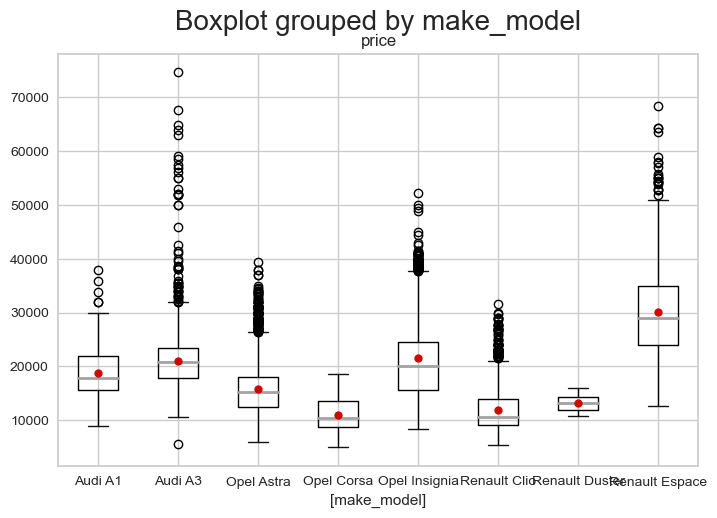

In [81]:
df[['make_model', 'price']].boxplot(by='make_model', whis=1.5)

In [82]:
df1 = df.copy()

for model in df["make_model"].unique():    
    car_prices = df[df["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)    
    IQR = Q3-Q1    
    lower_lim = Q1-1*IQR
    upper_lim = Q3+1*IQR

    drop_index = df[df["make_model"]==model][(car_prices<lower_lim) | (car_prices>upper_lim)].index
    df.drop(index = drop_index, inplace=True)
    
df1.shape, df.shape

((15900, 25), (14995, 25))

In [83]:
X = df.drop(columns="price")
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
X_train_dummy, X_test_dummy = trans_1_get_dummies(X_train, X_test, contain=',')
X_train_enc, X_test_enc = trans_2_OneHotEncoder(X_train_dummy, X_test_dummy)

In [84]:
# if you don't use pipeline, you can use scaled data directly
scaler = MinMaxScaler() 

X_train_scaled = scaler.fit_transform(X_train_enc) 
X_test_scaled  = scaler.transform(X_test_enc)

X_train_scaled.shape, X_train_scaled.shape

((11996, 152), (11996, 152))

### Linear Model

In [86]:
column_trans = make_column_transformer(
    (GetDummies(), cat_dummy), 
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_ohe),
    remainder = MinMaxScaler()
)

In [87]:
lin_reg = LinearRegression()

pipe_lin = Pipeline([
    ("transformer", column_trans),
    ("lin_reg", lin_reg)
])
pipe_lin.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('getdummies', GetDummies(),
                                                  ['comfort_convenience',
                                                   'entertainment_media',
                                                   'extras',
                                                   'safety_security']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'type', 'paint_type',
                                                   'gearing_type',
                                                   'drive_chain', 'fuel',
                                                   'emission_class',
                                                   'upholstery_type'])])),
                ('lin_reg', LinearRegression())])

In [88]:
ls

0            linear               
       linear_train    linear_test
R2         0.890419       0.891141
MAE     1708.896418    1707.450637
MSE  5966419.049891 5906469.084308
RMSE    2442.625442    2430.322835

In [89]:
ls2 = eval_metric_regression(pipe_lin, X_train, y_train, X_test, y_test, "linear")
ls2

0            linear               
       linear_train    linear_test
R2         0.912115       0.904636
MAE     1341.268402    1400.662054
MSE  3429020.128329 3780376.691480
RMSE    1851.761358    1944.319082

In [90]:
y_pred_adj = pipe_lin.predict(X_test)
adj_r2(y_test, y_pred_adj, X)

0.9044832223774188

In [91]:
lm_df2 = get_coeff_intercept(
    pipe_lin["lin_reg"].coef_, 
    pipe_lin["lin_reg"].intercept_, 
    model_name='linear', 
    columns=pipe_lin[:-1].get_feature_names_out()
)
lm_df2

,Coefficient_linear
getdummies__cc_Air conditioning,392.462375
getdummies__cc_Air suspension,151.783889
getdummies__cc_Armrest,-123.987949
getdummies__cc_Automatic climate control,234.385527
getdummies__cc_Auxiliary heating,29.845282
...,...
remainder__age,-3732.496522
remainder__hp_kw,10484.230205
remainder__warranty_months,603.288242
remainder__cons_comb,1278.740894


### Calculate Residuals & Visually Compare Residuals

In [92]:
y_pred_test = pipe_lin.predict(X_test)
y_pred_train = pipe_lin.predict(X_train)

In [93]:
df_comparing = pd.DataFrame({"Actual": y_test, "Prediction": y_pred_test, "Residual":y_test-y_pred_test})
df_comparing.head()

,Actual,Prediction,Residual
4393,19770,18298.500000,1471.500000
6532,17890,15672.500000,2217.500000
12664,29900,22976.000000,6924.000000
8708,7400,5436.000000,1964.000000
1147,18990,19823.000000,-833.000000


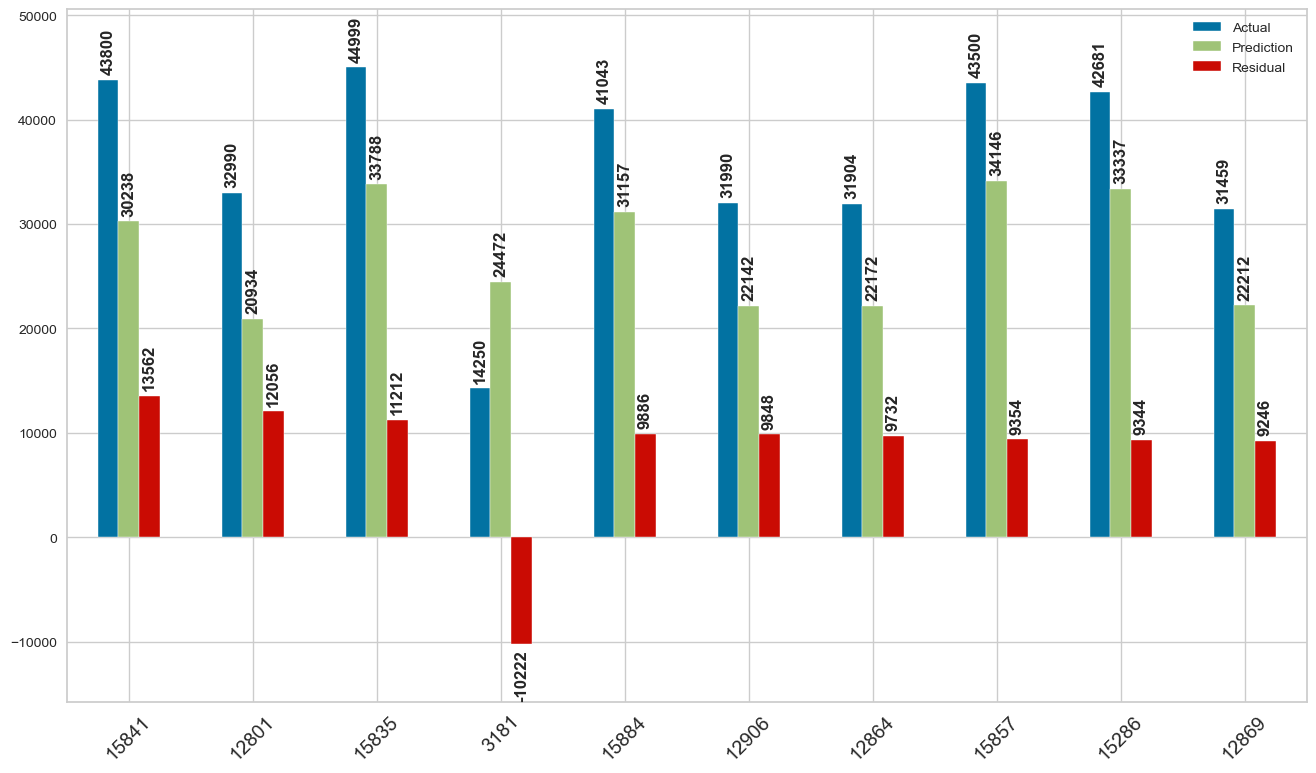

In [94]:
g = df_comparing.sort_values(by='Residual', key=abs, ascending=False).head(10).plot.bar(figsize=(16,9))

# annotate
for i in g.containers:
    g.bar_label(i, fmt='%.0f', fontsize=12, weight='bold', rotation=90, padding=4)

# pad the spacing between the number and the edge of the figure
g.margins(y=0.101) 

# tick_params(xaxis.set_tick_params) rotation or labelrotation
g.tick_params(axis='x', labelrotation=45, labelsize=14)

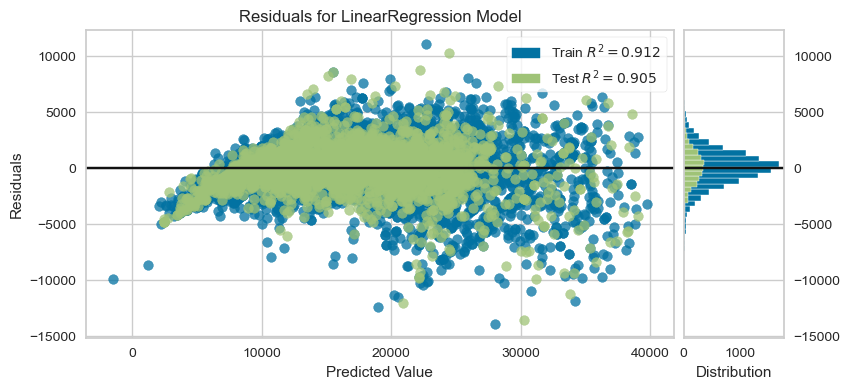

In [95]:
# Instantiate the linear model and visualizer
model = pipe_lin

visualizer = RadViz(size=(900, 400))
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

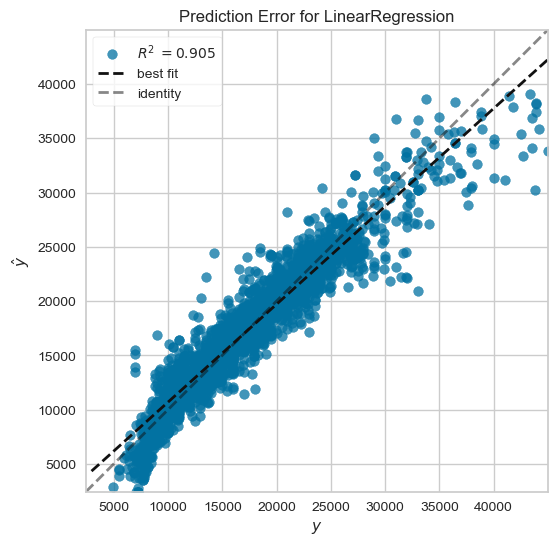

In [96]:
# Instantiate the linear model and visualizer
model = pipe_lin

visualizer = RadViz(size=(600, 600))
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                # Finalize and render the figure

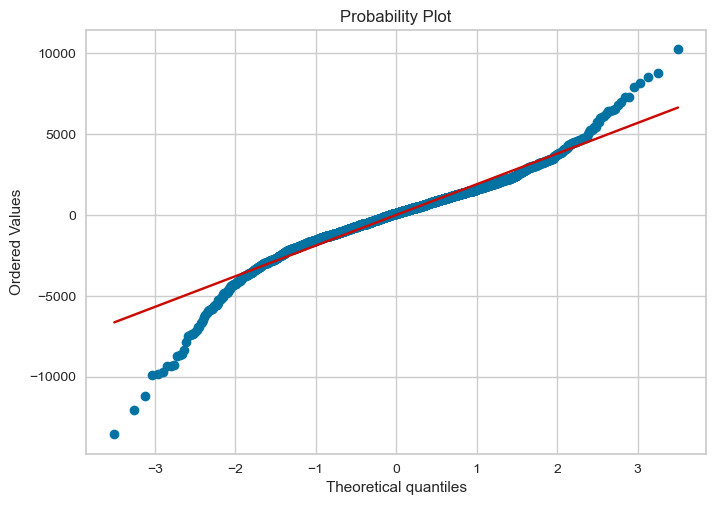

In [97]:
stats.probplot((y_pred_test-y_test), dist=stats.norm, plot=plt);

In [98]:
# Calc Slope
lm2 = get_coeff_intercept(
    pipe_lin["lin_reg"].coef_, 
    pipe_lin["lin_reg"].intercept_, 
    model_name='linear', 
    columns=pipe_lin[:-1].get_feature_names_out()
)
lm2

,Coefficient_linear
getdummies__cc_Air conditioning,392.462375
getdummies__cc_Air suspension,151.783889
getdummies__cc_Armrest,-123.987949
getdummies__cc_Automatic climate control,234.385527
getdummies__cc_Auxiliary heating,29.845282
...,...
remainder__age,-3732.496522
remainder__hp_kw,10484.230205
remainder__warranty_months,603.288242
remainder__cons_comb,1278.740894


## **Result:________**

- We used not scaled data because of the dummy features
- When we delete outliers by car model, our minimum and maximum residuals are reduced and our scores were improved.

# 4. Implement `Ridge` Regression

- Import the modul 
- **Do not forget to scale the data or use Normalize parameter as True**
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- **Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.**
- Fit the model and predict again with the new alpha value. 

In [100]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline

# for logarithmic transformation or MinMaxScaler... etc.
log_transform = FunctionTransformer(func=lambda x: np.log(x + 1), feature_names_out='one-to-one', validate=True)

cat_dummy = ["comfort_convenience", "entertainment_media", "extras", "safety_security"]
cat_ohe = X_train.select_dtypes(include='O').drop(columns=cat_dummy).columns.to_list()

column_trans = make_column_transformer(
    (GetDummies(), cat_dummy), 
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_ohe),
    remainder = MinMaxScaler()
)

In [101]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(
    alpha=1, 
    random_state=random_state
)
# # pipeline for Ridge
pipe_ridge = Pipeline([
    ("transformer", column_trans),
    ("ridge", ridge_model)
])
pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('getdummies', GetDummies(),
                                                  ['comfort_convenience',
                                                   'entertainment_media',
                                                   'extras',
                                                   'safety_security']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'type', 'paint_type',
                                                   'gearing_type',
                                                   'drive_chain', 'fuel',
                                                   'emission_class',
                                                   'upholstery_type'])])),
                ('ridge', Ridge(alpha=1, random_state=101))])

In [102]:
rs = eval_metric_regression(pipe_ridge, X_train, y_train, X_test, y_test, "ridge")
rs

0             ridge               
        ridge_train     ridge_test
R2         0.912069       0.904822
MAE     1341.106529    1398.892838
MSE  3430790.211295 3773009.824751
RMSE    1852.239242    1942.423699

In [103]:
pd.concat([ls2, rs], axis = 1)

0            linear                         ridge               
       linear_train    linear_test    ridge_train     ridge_test
R2         0.912115       0.904636       0.912069       0.904822
MAE     1341.268402    1400.662054    1341.106529    1398.892838
MSE  3429020.128329 3780376.691480 3430790.211295 3773009.824751
RMSE    1851.761358    1944.319082    1852.239242    1942.423699

In [104]:
pd.Series(pipe_ridge['ridge'].get_params())

alpha                     1
copy_X                 True
fit_intercept          True
max_iter               None
normalize        deprecated
positive              False
random_state            101
solver                 auto
tol                0.001000
dtype: object

## Cross Validate Model

In [105]:
ridge_model = Ridge(
    alpha=1, 
    random_state=random_state
) 
# pipeline for Cross Validate
model = Pipeline([
    ("transformer", column_trans),
    ("ridge", ridge_model)
])
scores = cross_validate(
    model, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
    return_train_score=True,
    cv=5
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.iloc[:, 2:].mean()

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,1.169779,0.213573,0.907230,0.912761,-1354.532965,-1344.506337,-3539923.854198,-3420964.839681,-1881.468537,-1849.585045
1,1.305496,0.208895,0.908121,0.912462,-1349.095906,-1341.550271,-3519069.683878,-3430969.509307,-1875.918357,-1852.287642
2,1.316476,0.208866,0.904183,0.913660,-1389.413491,-1333.684012,-3714742.933919,-3374030.638543,-1927.366839,-1836.853461
3,1.136757,0.206855,0.904916,0.913427,-1408.473978,-1325.017230,-3754663.490861,-3367245.609280,-1937.695407,-1835.005616
4,1.162230,0.212428,0.920214,0.909571,-1307.190764,-1352.323034,-3212638.620034,-3499365.194708,-1792.383502,-1870.659027


test_r2                                    0.908933
train_r2                                   0.912376
test_neg_mean_absolute_error           -1361.741421
train_neg_mean_absolute_error          -1339.416177
test_neg_mean_squared_error         -3548207.716578
train_neg_mean_squared_error        -3418515.158304
test_neg_root_mean_squared_error       -1882.966529
train_neg_root_mean_squared_error      -1848.878158
dtype: float64

In [106]:
rm_df = get_coeff_intercept(
    pipe_ridge["ridge"].coef_, 
    pipe_ridge["ridge"].intercept_, 
    model_name=f'ridge_alpha_{pipe_ridge["ridge"].alpha}', 
    columns=pipe_ridge[:-1].get_feature_names_out()
)
rm_df

,Coefficient_ridge_alpha_1
getdummies__cc_Air conditioning,386.730039
getdummies__cc_Air suspension,155.847107
getdummies__cc_Armrest,-122.101056
getdummies__cc_Automatic climate control,232.932715
getdummies__cc_Auxiliary heating,24.108658
...,...
remainder__age,-3765.368813
remainder__hp_kw,10113.110853
remainder__warranty_months,607.090109
remainder__cons_comb,1022.310184


In [107]:
pd.concat([lm_df2, rm_df], axis = 1)

,Coefficient_linear,Coefficient_ridge_alpha_1
getdummies__cc_Air conditioning,392.462375,386.730039
getdummies__cc_Air suspension,151.783889,155.847107
getdummies__cc_Armrest,-123.987949,-122.101056
getdummies__cc_Automatic climate control,234.385527,232.932715
getdummies__cc_Auxiliary heating,29.845282,24.108658
...,...,...
remainder__age,-3732.496522,-3765.368813
remainder__hp_kw,10484.230205,10113.110853
remainder__warranty_months,603.288242,607.090109
remainder__cons_comb,1278.740894,1022.310184


##  With Best Parameters (RidgeCV)

In [108]:
from sklearn.linear_model import RidgeCV

# will be used in pipeline later
ridgecv_model = RidgeCV(
    alphas = np.linspace(0.1, 1, 100).round(3), 
    scoring = "neg_root_mean_squared_error", 
    cv = 10,
)
# pipeline for RidgeCV
pipe_ridgecv = Pipeline([
    ("transformer", column_trans),
    ("ridgecv", ridgecv_model)
])
pipe_ridgecv.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('getdummies', GetDummies(),
                                                  ['comfort_convenience',
                                                   'entertainment_media',
                                                   'extras',
                                                   'safety_security']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'type', 'paint_type',
                                                   'gearing_type',
                                                   'drive_chain', 'fuel',
                                                   'emission_...
       0.509, 0.518, 0.527, 0.536, 0.545, 0.555, 0.564, 0.573, 0.582,
       0.591, 0.6  , 0.609, 0.618, 0.627, 0.636, 0.645, 0.655, 0.664,
       0.673, 0.682, 0.691, 0.7  , 0.709, 0.718, 0.727, 0.736, 0.745,
       0.755, 0.764, 0.773, 0.782, 0.791, 0.8  , 0.809, 0.818, 0.827,
       0.836, 0.845, 0.855, 0.864, 0.873, 0.882, 0.891, 0.9  , 0.909,
       0.918, 0.927, 0.936, 0.945, 0.955, 0.964, 0.973, 0.982, 0.991,
       1.   ]),
                         cv=10, scoring='neg_root_mean_squared_error'))])

In [109]:
pipe_ridgecv["ridgecv"].alpha_

0.527

In [110]:
rcs = eval_metric_regression(pipe_ridgecv, X_train, y_train, X_test, y_test, "ridge_cv")
rcs

0          ridge_cv               
     ridge_cv_train  ridge_cv_test
R2         0.912099       0.904769
MAE     1341.159232    1399.264657
MSE  3429648.541178 3775097.582538
RMSE    1851.931030    1942.961035

In [111]:
pd.concat([ls, rs, rcs], axis = 1)

0            linear                         ridge                 \
       linear_train    linear_test    ridge_train     ridge_test   
R2         0.890419       0.891141       0.912069       0.904822   
MAE     1708.896418    1707.450637    1341.106529    1398.892838   
MSE  5966419.049891 5906469.084308 3430790.211295 3773009.824751   
RMSE    2442.625442    2430.322835    1852.239242    1942.423699   

0          ridge_cv                 
     ridge_cv_train  ridge_cv_test  
R2         0.912099       0.904769  
MAE     1341.159232    1399.264657  
MSE  3429648.541178 3775097.582538  
RMSE    1851.931030    1942.961035

In [112]:
pd.Series(pipe_ridgecv["ridgecv"].get_params())

alpha_per_target                                                False
alphas              [0.1, 0.109, 0.118, 0.127, 0.136, 0.145, 0.155...
cv                                                                 10
fit_intercept                                                    True
gcv_mode                                                         None
normalize                                                  deprecated
scoring                                   neg_root_mean_squared_error
store_cv_values                                                 False
dtype: object

In [113]:
rcm_df = get_coeff_intercept(
    pipe_ridgecv["ridgecv"].coef_, 
    pipe_ridgecv["ridgecv"].intercept_, 
    model_name=f'ridgecv_alpha_{pipe_ridgecv["ridgecv"].alpha_}', 
    columns=pipe_ridgecv[:-1].get_feature_names_out()
)
rcm_df

,Coefficient_ridgecv_alpha_0.527
getdummies__cc_Air conditioning,388.652611
getdummies__cc_Air suspension,154.224800
getdummies__cc_Armrest,-123.125852
getdummies__cc_Automatic climate control,233.358214
getdummies__cc_Auxiliary heating,27.574630
...,...
remainder__age,-3749.842478
remainder__hp_kw,10288.031093
remainder__warranty_months,605.281634
remainder__cons_comb,1128.498280


In [114]:
pd.concat([lm_df, rm_df, rcm_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_0.527
getdummies__cc_Air conditioning,544.673868,386.730039,388.652611
getdummies__cc_Air suspension,-178.140781,155.847107,154.224800
getdummies__cc_Armrest,49.784697,-122.101056,-123.125852
getdummies__cc_Automatic climate control,280.937850,232.932715,233.358214
getdummies__cc_Auxiliary heating,-2.938253,24.108658,27.574630
...,...,...,...
remainder__age,-4057.637269,-3765.368813,-3749.842478
remainder__hp_kw,21799.201423,10113.110853,10288.031093
remainder__warranty_months,741.734010,607.090109,605.281634
remainder__cons_comb,4538.623597,1022.310184,1128.498280


## **Result:________**

- 

# 5. Implement `Lasso` Regression

- Import the modul 
- **Do not forget to scale the data or use Normalize parameter as True(If needed)**
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- **Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.**
- Fit the model and predict again with the new alpha value.
- **Compare different evaluation metrics**

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [115]:
from sklearn.linear_model import Lasso, LassoCV

lasso_model = Lasso(
    alpha=1, 
    random_state=random_state
)
# pipeline is used to combine scaler and model
pipe_lasso = Pipeline([
    ("transformer", column_trans),
    ("lasso", lasso_model)
]) 
pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('getdummies', GetDummies(),
                                                  ['comfort_convenience',
                                                   'entertainment_media',
                                                   'extras',
                                                   'safety_security']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'type', 'paint_type',
                                                   'gearing_type',
                                                   'drive_chain', 'fuel',
                                                   'emission_class',
                                                   'upholstery_type'])])),
                ('lasso', Lasso(alpha=1, random_state=101))])

In [116]:
lss = eval_metric_regression(pipe_lasso, X_train, y_train, X_test, y_test, "lasso")
lss

0             lasso               
        lasso_train     lasso_test
R2         0.911729       0.905182
MAE     1342.065727    1398.089024
MSE  3444060.363093 3758719.701169
RMSE    1855.817977    1938.741783

In [117]:
pd.concat([ls, rs, rcs, lss], axis = 1)

0            linear                         ridge                 \
       linear_train    linear_test    ridge_train     ridge_test   
R2         0.890419       0.891141       0.912069       0.904822   
MAE     1708.896418    1707.450637    1341.106529    1398.892838   
MSE  5966419.049891 5906469.084308 3430790.211295 3773009.824751   
RMSE    2442.625442    2430.322835    1852.239242    1942.423699   

0          ridge_cv                         lasso                 
     ridge_cv_train  ridge_cv_test    lasso_train     lasso_test  
R2         0.912099       0.904769       0.911729       0.905182  
MAE     1341.159232    1399.264657    1342.065727    1398.089024  
MSE  3429648.541178 3775097.582538 3444060.363093 3758719.701169  
RMSE    1851.931030    1942.961035    1855.817977    1938.741783

In [118]:
pd.Series(pipe_lasso['lasso'].get_params())

alpha                     1
copy_X                 True
fit_intercept          True
max_iter               1000
normalize        deprecated
positive              False
precompute            False
random_state            101
selection            cyclic
tol                0.000100
warm_start            False
dtype: object

## Cross Validate Model

In [119]:
lasso_model = Lasso(
    alpha=1, 
    random_state=random_state
)
# pipeline for Cross Validate
model = Pipeline([
    ("transformer", column_trans),
    ("lasso", lasso_model)
])
scores = cross_validate(
    model, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
    return_train_score=True,
    cv=5
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.iloc[:, 2:].mean()

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,2.016110,0.199677,0.907060,0.912475,-1353.354314,-1345.335312,-3546418.182628,-3432179.310299,-1883.193613,-1852.614183
1,2.028828,0.198677,0.908486,0.912138,-1346.228003,-1342.342192,-3505082.361217,-3443657.472516,-1872.186519,-1855.709426
2,1.841450,0.215217,0.904178,0.913283,-1387.218221,-1334.658762,-3714918.037964,-3388760.011688,-1927.412265,-1840.858499
3,1.798722,0.206245,0.904642,0.913144,-1407.574856,-1325.844575,-3765473.917878,-3378246.627478,-1940.482908,-1838.000715
4,1.974774,0.195989,0.920449,0.909214,-1305.602287,-1353.010669,-3203188.899039,-3513183.528398,-1789.745484,-1874.348828


test_r2                                    0.908963
train_r2                                   0.912051
test_neg_mean_absolute_error           -1359.995536
train_neg_mean_absolute_error          -1340.238302
test_neg_mean_squared_error         -3547016.279745
train_neg_mean_squared_error        -3431205.390076
test_neg_root_mean_squared_error       -1882.604158
train_neg_root_mean_squared_error      -1852.306330
dtype: float64

In [120]:
lsm_df = get_coeff_intercept(
    pipe_lasso["lasso"].coef_, 
    pipe_lasso["lasso"].intercept_, 
    model_name=f'lasso_alpha_{pipe_lasso["lasso"].alpha}', 
    columns=pipe_lasso[:-1].get_feature_names_out()
)
lsm_df

,Coefficient_lasso_alpha_1
getdummies__cc_Air conditioning,364.458834
getdummies__cc_Air suspension,0.000000
getdummies__cc_Armrest,-106.517566
getdummies__cc_Automatic climate control,237.112335
getdummies__cc_Auxiliary heating,0.000000
...,...
remainder__age,-3783.602474
remainder__hp_kw,10079.240084
remainder__warranty_months,574.108632
remainder__cons_comb,0.000000


In [121]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_0.527,Coefficient_lasso_alpha_1
getdummies__cc_Air conditioning,544.673868,386.730039,388.652611,364.458834
getdummies__cc_Air suspension,-178.140781,155.847107,154.224800,0.000000
getdummies__cc_Armrest,49.784697,-122.101056,-123.125852,-106.517566
getdummies__cc_Automatic climate control,280.937850,232.932715,233.358214,237.112335
getdummies__cc_Auxiliary heating,-2.938253,24.108658,27.574630,0.000000
...,...,...,...,...
remainder__age,-4057.637269,-3765.368813,-3749.842478,-3783.602474
remainder__hp_kw,21799.201423,10113.110853,10288.031093,10079.240084
remainder__warranty_months,741.734010,607.090109,605.281634,574.108632
remainder__cons_comb,4538.623597,1022.310184,1128.498280,0.000000


## With Best Parameters (LassoCV)

In [122]:
# will be used in pipeline later
lassocv_model = LassoCV(
    alphas= np.linspace(0.1, 1, 100).round(3), 
    random_state=random_state,
    cv=10, 
)
pipe_lassocv = Pipeline([
    ("transformer", column_trans),
    ("lassocv", lassocv_model)
]) 
pipe_lassocv.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('getdummies', GetDummies(),
                                                  ['comfort_convenience',
                                                   'entertainment_media',
                                                   'extras',
                                                   'safety_security']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'type', 'paint_type',
                                                   'gearing_type',
                                                   'drive_chain', 'fuel',
                                                   'emission_...
       0.427, 0.436, 0.445, 0.455, 0.464, 0.473, 0.482, 0.491, 0.5  ,
       0.509, 0.518, 0.527, 0.536, 0.545, 0.555, 0.564, 0.573, 0.582,
       0.591, 0.6  , 0.609, 0.618, 0.627, 0.636, 0.645, 0.655, 0.664,
       0.673, 0.682, 0.691, 0.7  , 0.709, 0.718, 0.727, 0.736, 0.745,
       0.755, 0.764, 0.773, 0.782, 0.791, 0.8  , 0.809, 0.818, 0.827,
       0.836, 0.845, 0.855, 0.864, 0.873, 0.882, 0.891, 0.9  , 0.909,
       0.918, 0.927, 0.936, 0.945, 0.955, 0.964, 0.973, 0.982, 0.991,
       1.   ]),
                         cv=10, random_state=101))])

In [123]:
pipe_lassocv["lassocv"].alpha_

0.382

In [124]:
lcs = eval_metric_regression(pipe_lassocv, X_train, y_train, X_test, y_test, "lasso_cv")
lcs

0          lasso_cv               
     lasso_cv_train  lasso_cv_test
R2         0.912017       0.905038
MAE     1341.602861    1398.303921
MSE  3432832.642703 3764444.397228
RMSE    1852.790502    1940.217616

In [125]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

0            linear                         ridge                 \
       linear_train    linear_test    ridge_train     ridge_test   
R2         0.890419       0.891141       0.912069       0.904822   
MAE     1708.896418    1707.450637    1341.106529    1398.892838   
MSE  5966419.049891 5906469.084308 3430790.211295 3773009.824751   
RMSE    2442.625442    2430.322835    1852.239242    1942.423699   

0          ridge_cv                         lasso                 \
     ridge_cv_train  ridge_cv_test    lasso_train     lasso_test   
R2         0.912099       0.904769       0.911729       0.905182   
MAE     1341.159232    1399.264657    1342.065727    1398.089024   
MSE  3429648.541178 3775097.582538 3444060.363093 3758719.701169   
RMSE    1851.931030    1942.961035    1855.817977    1938.741783   

0          lasso_cv                 
     lasso_cv_train  lasso_cv_test  
R2         0.912017       0.905038  
MAE     1341.602861    1398.303921  
MSE  3432832.642703 3764444.397228  
RMSE    1852.790502    1940.217616

In [126]:
lcm_df = get_coeff_intercept(
    pipe_lassocv["lassocv"].coef_, 
    pipe_lassocv["lassocv"].intercept_, 
    model_name=f'lassocv_alpha_{pipe_lassocv["lassocv"].alpha_}', 
    columns=pipe_lassocv[:-1].get_feature_names_out()
)
lcm_df

,Coefficient_lassocv_alpha_0.382
getdummies__cc_Air conditioning,380.106322
getdummies__cc_Air suspension,17.739604
getdummies__cc_Armrest,-118.503559
getdummies__cc_Automatic climate control,235.367996
getdummies__cc_Auxiliary heating,8.758243
...,...
remainder__age,-3753.847944
remainder__hp_kw,10339.909677
remainder__warranty_months,591.415175
remainder__cons_comb,748.249434


In [127]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_0.527,Coefficient_lasso_alpha_1,Coefficient_lassocv_alpha_0.382
getdummies__cc_Air conditioning,544.673868,386.730039,388.652611,364.458834,380.106322
getdummies__cc_Air suspension,-178.140781,155.847107,154.224800,0.000000,17.739604
getdummies__cc_Armrest,49.784697,-122.101056,-123.125852,-106.517566,-118.503559
getdummies__cc_Automatic climate control,280.937850,232.932715,233.358214,237.112335,235.367996
getdummies__cc_Auxiliary heating,-2.938253,24.108658,27.574630,0.000000,8.758243
...,...,...,...,...,...
remainder__age,-4057.637269,-3765.368813,-3749.842478,-3783.602474,-3753.847944
remainder__hp_kw,21799.201423,10113.110853,10288.031093,10079.240084,10339.909677
remainder__warranty_months,741.734010,607.090109,605.281634,574.108632,591.415175
remainder__cons_comb,4538.623597,1022.310184,1128.498280,0.000000,748.249434


## **Result:________**

-

# 6. Implement `Elastic-Net` Regression

- Import the modul 
- **Do not forget to scale the data or use Normalize parameter as True(If needed)**
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- **Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.**
- Fit the model and predict again with the new alpha value.
- **Compare different evaluation metrics**

In [128]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

# l1_ratio is used to control the amount of L1 and L2 regularization
elastic_model = ElasticNet(
    alpha=1, 
    l1_ratio=0.5, 
    random_state=random_state
)
pipe_elastic = Pipeline([
    ("transformer", column_trans),
    ("elastic", elastic_model)
]) 
pipe_elastic.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('getdummies', GetDummies(),
                                                  ['comfort_convenience',
                                                   'entertainment_media',
                                                   'extras',
                                                   'safety_security']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'type', 'paint_type',
                                                   'gearing_type',
                                                   'drive_chain', 'fuel',
                                                   'emission_class',
                                                   'upholstery_type'])])),
                ('elastic', ElasticNet(alpha=1, random_state=101))])

In [129]:
es = eval_metric_regression(pipe_elastic, X_train, y_train, X_test, y_test, "elastic")
es

0            elastic                
       elastic_train    elastic_test
R2          0.635770        0.630099
MAE      2903.130828     2928.270212
MSE  14211141.511135 14663459.057901
RMSE     3769.766771     3829.289628

In [130]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

0            linear                         ridge                 \
       linear_train    linear_test    ridge_train     ridge_test   
R2         0.890419       0.891141       0.912069       0.904822   
MAE     1708.896418    1707.450637    1341.106529    1398.892838   
MSE  5966419.049891 5906469.084308 3430790.211295 3773009.824751   
RMSE    2442.625442    2430.322835    1852.239242    1942.423699   

0          ridge_cv                         lasso                 \
     ridge_cv_train  ridge_cv_test    lasso_train     lasso_test   
R2         0.912099       0.904769       0.911729       0.905182   
MAE     1341.159232    1399.264657    1342.065727    1398.089024   
MSE  3429648.541178 3775097.582538 3444060.363093 3758719.701169   
RMSE    1851.931030    1942.961035    1855.817977    1938.741783   

0          lasso_cv                        elastic                  
     lasso_cv_train  lasso_cv_test   elastic_train    elastic_test  
R2         0.912017       0.905038        0.635770        0.630099  
MAE     1341.602861    1398.303921     2903.130828     2928.270212  
MSE  3432832.642703 3764444.397228 14211141.511135 14663459.057901  
RMSE    1852.790502    1940.217616     3769.766771     3829.289628

In [131]:
pd.Series(pipe_elastic["elastic"].get_params())

alpha                     1
copy_X                 True
fit_intercept          True
l1_ratio           0.500000
max_iter               1000
normalize        deprecated
positive              False
precompute            False
random_state            101
selection            cyclic
tol                0.000100
warm_start            False
dtype: object

## Cross Validate Model

In [132]:
elastic_model = ElasticNet(
    alpha=1, 
    l1_ratio=0.5, 
    random_state=random_state
)
model = Pipeline([
    ("transformer", column_trans),
    ("elastic", elastic_model)
])
scores = cross_validate(
    model, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
    cv=5
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.iloc[:, 2:].mean()

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,1.451924,0.193989,0.636653,-2934.006609,-13864594.011378,-3723.519036
1,1.213263,0.210630,0.629376,-2898.195507,-14195354.308441,-3767.672267
2,1.373116,0.195392,0.630728,-2892.161186,-14316332.587293,-3783.692983
3,1.188808,0.204834,0.634998,-2890.074661,-14413072.159323,-3796.455210
4,1.345115,0.196697,0.641204,-2917.029967,-14447270.851295,-3800.956571


test_r2                                    0.634592
test_neg_mean_absolute_error           -2906.293586
test_neg_mean_squared_error        -14247324.783546
test_neg_root_mean_squared_error       -3774.459213
dtype: float64

In [133]:
dict(pd.Series(pipe_elastic["elastic"].get_params().items()).iloc[[0,3]].values)

{'alpha': 1, 'l1_ratio': 0.5}

In [134]:
em_df = get_coeff_intercept(
    pipe_elastic["elastic"].coef_, 
    pipe_elastic["elastic"].intercept_, 
    model_name=f'elastic_{dict(pd.Series(pipe_elastic["elastic"].get_params().items()).iloc[[0,3]].values)}', 
    columns=pipe_elastic[:-1].get_feature_names_out()
)
em_df

,"Coefficient_elastic_{'alpha': 1, 'l1_ratio': 0.5}"
getdummies__cc_Air conditioning,-33.949187
getdummies__cc_Air suspension,11.174463
getdummies__cc_Armrest,389.555670
getdummies__cc_Automatic climate control,682.284457
getdummies__cc_Auxiliary heating,-10.821330
...,...
remainder__age,-1072.079772
remainder__hp_kw,459.386784
remainder__warranty_months,242.979819
remainder__cons_comb,111.071391


In [135]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1) 

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_0.527,Coefficient_lasso_alpha_1,Coefficient_lassocv_alpha_0.382,"Coefficient_elastic_{'alpha': 1, 'l1_ratio': 0.5}"
getdummies__cc_Air conditioning,544.673868,386.730039,388.652611,364.458834,380.106322,-33.949187
getdummies__cc_Air suspension,-178.140781,155.847107,154.224800,0.000000,17.739604,11.174463
getdummies__cc_Armrest,49.784697,-122.101056,-123.125852,-106.517566,-118.503559,389.555670
getdummies__cc_Automatic climate control,280.937850,232.932715,233.358214,237.112335,235.367996,682.284457
getdummies__cc_Auxiliary heating,-2.938253,24.108658,27.574630,0.000000,8.758243,-10.821330
...,...,...,...,...,...,...
remainder__age,-4057.637269,-3765.368813,-3749.842478,-3783.602474,-3753.847944,-1072.079772
remainder__hp_kw,21799.201423,10113.110853,10288.031093,10079.240084,10339.909677,459.386784
remainder__warranty_months,741.734010,607.090109,605.281634,574.108632,591.415175,242.979819
remainder__cons_comb,4538.623597,1022.310184,1128.498280,0.000000,748.249434,111.071391


## With Best Parameters (GridsearchCV)

In [136]:
from sklearn.model_selection import GridSearchCV

elastic_model = ElasticNet(
    random_state=random_state
)
# pipeline for GridsearchCV
pipe_elastic = Pipeline([
    ("transformer", column_trans),
    ("elastic", elastic_model)
])
param_grid = {
    "elastic__alpha": np.linspace(0.1, 1, 100).round(3),
    "elastic__l1_ratio": np.linspace(0.5, 1, 3)
}
grid_model = GridSearchCV(
    estimator = pipe_elastic, 
    param_grid = param_grid, 
    scoring = 'neg_root_mean_squared_error',
    cv = 5, 
)
# pd.Series(grid_model.get_params())

In [137]:
%%time
grid_model.fit(X_train, y_train)

Wall time: 49min 44s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('getdummies',
                                                                         GetDummies(),
                                                                         ['comfort_convenience',
                                                                          'entertainment_media',
                                                                          'extras',
                                                                          'safety_security']),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'type',
                                                                          'paint_type',
                                                                          'gearing_type',
                                                                          'dr...
       0.509, 0.518, 0.527, 0.536, 0.545, 0.555, 0.564, 0.573, 0.582,
       0.591, 0.6  , 0.609, 0.618, 0.627, 0.636, 0.645, 0.655, 0.664,
       0.673, 0.682, 0.691, 0.7  , 0.709, 0.718, 0.727, 0.736, 0.745,
       0.755, 0.764, 0.773, 0.782, 0.791, 0.8  , 0.809, 0.818, 0.827,
       0.836, 0.845, 0.855, 0.864, 0.873, 0.882, 0.891, 0.9  , 0.909,
       0.918, 0.927, 0.936, 0.945, 0.955, 0.964, 0.973, 0.982, 0.991,
       1.   ]),
                         'elastic__l1_ratio': array([0.5 , 0.75, 1.  ])},
             scoring='neg_root_mean_squared_error')

In [138]:
grid_model.best_params_

{'elastic__alpha': 0.382, 'elastic__l1_ratio': 1.0}

In [139]:
grid_model.best_score_

-1881.8044270536761

In [140]:
grid_model.best_index_

95

In [141]:
gm = eval_metric_regression(grid_model, X_train, y_train, X_test, y_test, "elastic_grid")
gm

0          elastic_grid                  
     elastic_grid_train elastic_grid_test
R2             0.912017          0.905038
MAE         1341.602861       1398.303921
MSE      3432832.642703    3764444.397228
RMSE        1852.790502       1940.217616

In [142]:
pd.concat([ls,rs, rcs, lss, lcs, es, gm], axis = 1)

0            linear                         ridge                 \
       linear_train    linear_test    ridge_train     ridge_test   
R2         0.890419       0.891141       0.912069       0.904822   
MAE     1708.896418    1707.450637    1341.106529    1398.892838   
MSE  5966419.049891 5906469.084308 3430790.211295 3773009.824751   
RMSE    2442.625442    2430.322835    1852.239242    1942.423699   

0          ridge_cv                         lasso                 \
     ridge_cv_train  ridge_cv_test    lasso_train     lasso_test   
R2         0.912099       0.904769       0.911729       0.905182   
MAE     1341.159232    1399.264657    1342.065727    1398.089024   
MSE  3429648.541178 3775097.582538 3444060.363093 3758719.701169   
RMSE    1851.931030    1942.961035    1855.817977    1938.741783   

0          lasso_cv                        elastic                  \
     lasso_cv_train  lasso_cv_test   elastic_train    elastic_test   
R2         0.912017       0.905038        0.635770        0.630099   
MAE     1341.602861    1398.303921     2903.130828     2928.270212   
MSE  3432832.642703 3764444.397228 14211141.511135 14663459.057901   
RMSE    1852.790502    1940.217616     3769.766771     3829.289628   

0          elastic_grid                    
     elastic_grid_train elastic_grid_test  
R2             0.912017          0.905038  
MAE         1341.602861       1398.303921  
MSE      3432832.642703    3764444.397228  
RMSE        1852.790502       1940.217616

In [143]:
egm_df = get_coeff_intercept(
    grid_model.best_estimator_.named_steps['elastic'].coef_, 
    grid_model.best_estimator_.named_steps['elastic'].intercept_, 
    model_name=f'elastic_grid_{grid_model.best_params_}', 
    columns=grid_model.estimator[:-1].get_feature_names_out()
)
egm_df

,"Coefficient_elastic_grid_{'elastic__alpha': 0.382, 'elastic__l1_ratio': 1.0}"
getdummies__cc_Air conditioning,380.106322
getdummies__cc_Air suspension,17.739604
getdummies__cc_Armrest,-118.503559
getdummies__cc_Automatic climate control,235.367996
getdummies__cc_Auxiliary heating,8.758243
...,...
remainder__age,-3753.847944
remainder__hp_kw,10339.909677
remainder__warranty_months,591.415175
remainder__cons_comb,748.249434


In [144]:
df_coeff = pd.concat([lm_df2, rm_df, rcm_df, lsm_df, lcm_df, em_df, egm_df], axis = 1)
df_coeff

,Coefficient_linear,Coefficient_ridge_alpha_1,Coefficient_ridgecv_alpha_0.527,Coefficient_lasso_alpha_1,Coefficient_lassocv_alpha_0.382,"Coefficient_elastic_{'alpha': 1, 'l1_ratio': 0.5}","Coefficient_elastic_grid_{'elastic__alpha': 0.382, 'elastic__l1_ratio': 1.0}"
getdummies__cc_Air conditioning,392.462375,386.730039,388.652611,364.458834,380.106322,-33.949187,380.106322
getdummies__cc_Air suspension,151.783889,155.847107,154.224800,0.000000,17.739604,11.174463,17.739604
getdummies__cc_Armrest,-123.987949,-122.101056,-123.125852,-106.517566,-118.503559,389.555670,-118.503559
getdummies__cc_Automatic climate control,234.385527,232.932715,233.358214,237.112335,235.367996,682.284457,235.367996
getdummies__cc_Auxiliary heating,29.845282,24.108658,27.574630,0.000000,8.758243,-10.821330,8.758243
...,...,...,...,...,...,...,...
remainder__age,-3732.496522,-3765.368813,-3749.842478,-3783.602474,-3753.847944,-1072.079772,-3753.847944
remainder__hp_kw,10484.230205,10113.110853,10288.031093,10079.240084,10339.909677,459.386784,10339.909677
remainder__warranty_months,603.288242,607.090109,605.281634,574.108632,591.415175,242.979819,591.415175
remainder__cons_comb,1278.740894,1022.310184,1128.498280,0.000000,748.249434,111.071391,748.249434


### Grid Search for ElasticNet vs Lasso Result

In [145]:
df_coeff.columns

Index(['Coefficient_linear', 'Coefficient_ridge_alpha_1',
       'Coefficient_ridgecv_alpha_0.527', 'Coefficient_lasso_alpha_1',
       'Coefficient_lassocv_alpha_0.382',
       'Coefficient_elastic_{'alpha': 1, 'l1_ratio': 0.5}',
       'Coefficient_elastic_grid_{'elastic__alpha': 0.382, 'elastic__l1_ratio': 1.0}'],
      dtype='object')

In [146]:
df_coeff.iloc[:, [4, 6]]

,Coefficient_lassocv_alpha_0.382,"Coefficient_elastic_grid_{'elastic__alpha': 0.382, 'elastic__l1_ratio': 1.0}"
getdummies__cc_Air conditioning,380.106322,380.106322
getdummies__cc_Air suspension,17.739604,17.739604
getdummies__cc_Armrest,-118.503559,-118.503559
getdummies__cc_Automatic climate control,235.367996,235.367996
getdummies__cc_Auxiliary heating,8.758243,8.758243
...,...,...
remainder__age,-3753.847944,-3753.847944
remainder__hp_kw,10339.909677,10339.909677
remainder__warranty_months,591.415175,591.415175
remainder__cons_comb,748.249434,748.249434


In [147]:
# check difference zero
df_coeff.iloc[:, [4, 6]].diff(axis=1).sum()

Coefficient_lassocv_alpha_0.382                                                0.000000
Coefficient_elastic_grid_{'elastic__alpha': 0.382, 'elastic__l1_ratio': 1.0}   0.000000
dtype: float64

## **Result:________**

- my model work %100 lasso and alpha value:0.8

# 7. `Feature importances` In a Graph

## Feature importances with Ridge

In [148]:
pipe_ridgecv["ridgecv"].alpha_

0.527

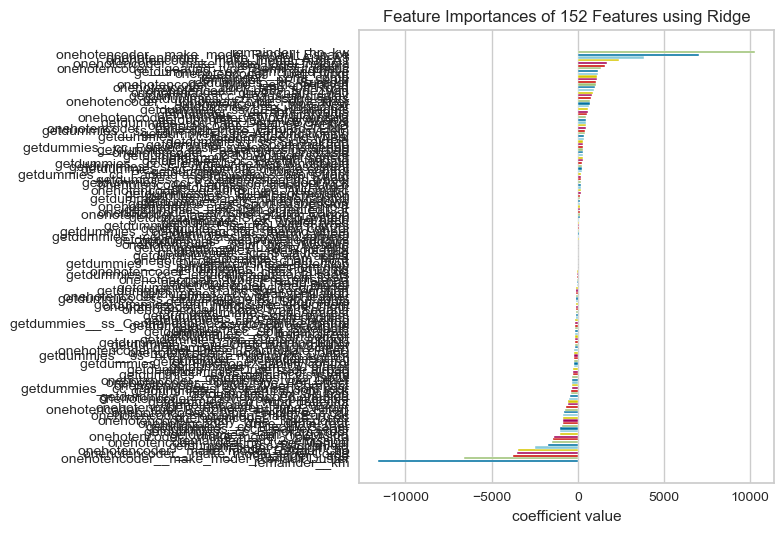

<AxesSubplot:title={'center':'Feature Importances of 152 Features using Ridge'}, xlabel='coefficient value'>

In [149]:
from yellowbrick.model_selection import FeatureImportances 

ridge_model = Ridge(
    alpha=pipe_ridgecv["ridgecv"].alpha_, 
    random_state=random_state
) 
model = Pipeline([
    ("transformer", column_trans),
    ("ridge", ridge_model)
])

viz = FeatureImportances(model[-1], labels=model[:-1].get_feature_names_out(), relative=False)
viz.fit(model[:-1].fit_transform(X_train), y_train)
viz.show()

## Feature importances with Lasso

In [150]:
pipe_lassocv["lassocv"].alpha_

0.382

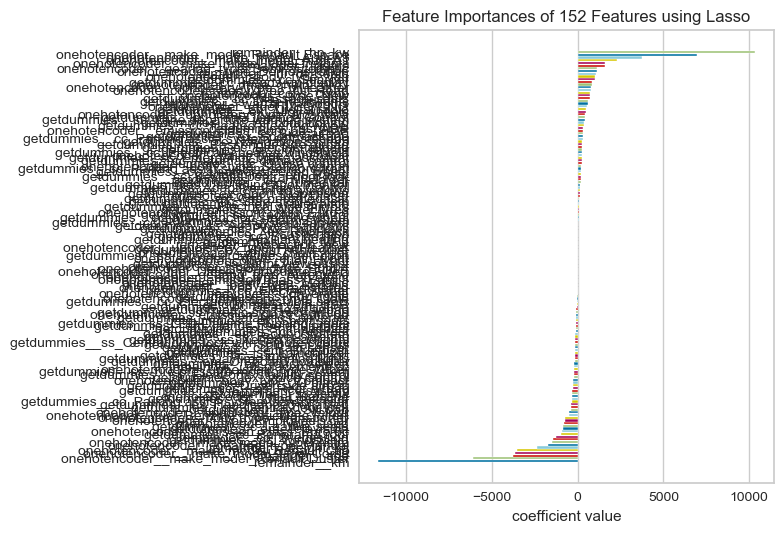

<AxesSubplot:title={'center':'Feature Importances of 152 Features using Lasso'}, xlabel='coefficient value'>

In [151]:
from yellowbrick.model_selection import FeatureImportances

lasso_model = Lasso(
    alpha=pipe_lassocv["lassocv"].alpha_, 
    random_state=random_state
)
# pipeline for Cross Validate
model = Pipeline([
    ("transformer", column_trans),
    ("lasso", lasso_model)
])
 
viz = FeatureImportances(model[-1], labels=model[:-1].get_feature_names_out(), relative=False)
viz.fit(model[:-1].fit_transform(X_train), y_train)
viz.show()

In [152]:
viz.estimator.alpha

0.382

In [153]:
viz.estimator.l1_ratio

1.0

In [154]:
pd.Series(viz.feature_importances_, index=viz.features_
    ).sort_values(key =abs, ascending=False
    ).to_frame(f'Coefficient_Viz_{viz.estimator}').head(20)

,"Coefficient_Viz_Lasso(alpha=0.382, random_state=101)"
remainder__km,-11629.950950
remainder__hp_kw,10339.909677
onehotencoder__make_model_Renault Espace,6939.472448
onehotencoder__make_model_Renault Duster,-6092.313204
onehotencoder__make_model_Audi A3,3775.986933
remainder__age,-3753.847944
onehotencoder__make_model_Opel Corsa,-3616.645572
onehotencoder__make_model_Renault Clio,-3508.871467
remainder__weight_kg,-2338.563622
onehotencoder__make_model_Audi A1,2316.000992


In [155]:
lcm_df.sort_values(by=lcm_df.columns[0], key =abs, ascending=False)[1:21]

,Coefficient_lassocv_alpha_0.382
remainder__km,-11629.950950
remainder__hp_kw,10339.909677
onehotencoder__make_model_Renault Espace,6939.472448
onehotencoder__make_model_Renault Duster,-6092.313204
onehotencoder__make_model_Audi A3,3775.986933
remainder__age,-3753.847944
onehotencoder__make_model_Opel Corsa,-3616.645572
onehotencoder__make_model_Renault Clio,-3508.871467
remainder__weight_kg,-2338.563622
onehotencoder__make_model_Audi A1,2316.000992


In [156]:
egm_df.sort_values(by=egm_df.columns[0], key =abs, ascending=False)[1:21]

,"Coefficient_elastic_grid_{'elastic__alpha': 0.382, 'elastic__l1_ratio': 1.0}"
remainder__km,-11629.950950
remainder__hp_kw,10339.909677
onehotencoder__make_model_Renault Espace,6939.472448
onehotencoder__make_model_Renault Duster,-6092.313204
onehotencoder__make_model_Audi A3,3775.986933
remainder__age,-3753.847944
onehotencoder__make_model_Opel Corsa,-3616.645572
onehotencoder__make_model_Renault Clio,-3508.871467
remainder__weight_kg,-2338.563622
onehotencoder__make_model_Audi A1,2316.000992


# 8. Detect Final Model Define Data

In [157]:
df.shape

(14995, 25)

In [158]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'type', 'inspection_new',
       'paint_type', 'nr_of_seats', 'gearing_type', 'displacement_cc',
       'weight_kg', 'drive_chain', 'fuel', 'co_2_emission', 'emission_class',
       'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'gears', 'age', 'hp_kw', 'warranty_months',
       'upholstery_type', 'cons_comb'],
      dtype='object')

In [159]:
df_final = df[['make_model', 'hp_kw', 'km', 'age', 'gearing_type', 'gears', 'weight_kg', 'price']]
df_final.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
make_model,14995,8,Audi A3,3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hp_kw,14995.000000,NaN,NaN,NaN,86.082828,23.804867,51.000000,66.000000,85.000000,100.000000,239.000000
km,14995.000000,NaN,NaN,NaN,33792.312789,37101.266261,0.000000,5000.000000,22462.000000,49351.000000,317000.000000
age,14995.000000,NaN,NaN,NaN,1.479060,1.100278,0.000000,1.000000,1.000000,2.000000,3.000000
gearing_type,14995,3,Manual,8047,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gears,14995.000000,NaN,NaN,NaN,5.858286,0.705920,5.000000,5.000000,6.000000,6.000000,8.000000
weight_kg,14995.000000,NaN,NaN,NaN,1338.558520,205.190159,840.000000,1165.000000,1278.000000,1440.000000,2471.000000
price,14995.000000,NaN,NaN,NaN,17145.783261,6256.701226,4950.000000,12490.000000,16445.000000,20999.000000,45990.000000


In [160]:
X = df_final.drop(columns=["price"])
y = df_final["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

## Detect Final Model 

In [161]:
cat_ohe2 = X_train.select_dtypes(include='O').columns

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_ohe2),
    remainder = MinMaxScaler()
)

In [162]:
lasso = Lasso(
    random_state=random_state
)
# pipeline is used to combine scaler and model
pipe_final = Pipeline([
    ("transformer", column_trans),
    ("lasso", lasso)
]) 
pipe_final.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['make_model', 'gearing_type'], dtype='object'))])),
                ('lasso', Lasso(random_state=101))])

In [163]:
fs = eval_metric_regression(pipe_final, X_train, y_train, X_test, y_test, "lasso_final")
fs

0          lasso_final                 
     lasso_final_train lasso_final_test
R2            0.886779         0.878717
MAE        1495.970944      1543.151596
MSE     4417525.687003   4807849.030931
RMSE       2101.791066      2192.680786

## Cross Validate Model

In [164]:
lasso = Lasso(
    random_state=random_state
)
model = Pipeline([
    ("transformer", column_trans),
    ("lasso", lasso)
])
scores = cross_validate(
    model, X_train, y_train,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
    return_train_score=True,
    cv= 5
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.iloc[:, 2:].mean()

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.108679,0.011002,0.885031,0.887130,-1499.805996,-1496.845353,-4387005.683654,-4426040.620297,-2094.518007,-2103.815729
1,0.103658,0.011998,0.882430,0.887737,-1494.029778,-1494.192229,-4503055.855287,-4400056.605079,-2122.040493,-2097.631189
2,0.099226,0.011517,0.881393,0.888072,-1507.663715,-1494.364438,-4598296.287476,-4373983.752200,-2144.363842,-2091.407123
3,0.103357,0.009571,0.880734,0.888209,-1528.719779,-1486.991819,-4709544.594938,-4348087.273423,-2170.148519,-2085.206770
4,0.101046,0.011999,0.901400,0.882930,-1463.616267,-1506.575872,-3970205.241876,-4530296.928024,-1992.537388,-2128.449419


test_r2                                    0.886198
train_r2                                   0.886816
test_neg_mean_absolute_error           -1498.767107
train_neg_mean_absolute_error          -1495.793942
test_neg_mean_squared_error         -4433621.532646
train_neg_mean_squared_error        -4415693.035805
test_neg_root_mean_squared_error       -2104.721650
train_neg_root_mean_squared_error      -2101.302046
dtype: float64

## With Best Parameters (GridsearchCV)

In [165]:
lasso = Lasso(
    random_state=random_state
)
model = Pipeline([
    ("transformer", column_trans),
    ("lasso", lasso)
])
param_grid = {
    "lasso__alpha": np.linspace(0.1, 1, 30).round(3)
}
grid_model_final = GridSearchCV(
    estimator = model, 
    param_grid = param_grid, 
    scoring = 'neg_root_mean_squared_error',
    cv = 10
)
# grid_model_final.get_params().keys()

In [166]:
grid_model_final.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['make_model', 'gearing_type'], dtype='object'))])),
                                       ('lasso', Lasso(random_state=101))]),
             param_grid={'lasso__alpha': array([0.1  , 0.131, 0.162, 0.193, 0.224, 0.255, 0.286, 0.317, 0.348,
       0.379, 0.41 , 0.441, 0.472, 0.503, 0.534, 0.566, 0.597, 0.628,
       0.659, 0.69 , 0.721, 0.752, 0.783, 0.814, 0.845, 0.876, 0.907,
       0.938, 0.969, 1.   ])},
             scoring='neg_root_mean_squared_error')

In [167]:
%%time
grid_model_final.best_params_

Wall time: 0 ns


{'lasso__alpha': 0.1}

In [168]:
grid_model_final.best_score_

-2102.277744192744

In [169]:
gm_final = eval_metric_regression(grid_model_final, X_train, y_train, X_test, y_test, "final_model_lasso")
gm_final

0          final_model_lasso                       
     final_model_lasso_train final_model_lasso_test
R2                  0.886804               0.878720
MAE              1497.038752            1544.461028
MSE           4416555.406489         4807717.612505
RMSE             2101.560231            2192.650819

In [170]:
df_scores = pd.concat([ls, rs, rcs, lss, lcs, es, gm, gm_final], axis = 1)
df_scores

0            linear                         ridge                 \
       linear_train    linear_test    ridge_train     ridge_test   
R2         0.890419       0.891141       0.912069       0.904822   
MAE     1708.896418    1707.450637    1341.106529    1398.892838   
MSE  5966419.049891 5906469.084308 3430790.211295 3773009.824751   
RMSE    2442.625442    2430.322835    1852.239242    1942.423699   

0          ridge_cv                         lasso                 \
     ridge_cv_train  ridge_cv_test    lasso_train     lasso_test   
R2         0.912099       0.904769       0.911729       0.905182   
MAE     1341.159232    1399.264657    1342.065727    1398.089024   
MSE  3429648.541178 3775097.582538 3444060.363093 3758719.701169   
RMSE    1851.931030    1942.961035    1855.817977    1938.741783   

0          lasso_cv                        elastic                  \
     lasso_cv_train  lasso_cv_test   elastic_train    elastic_test   
R2         0.912017       0.905038        0.635770        0.630099   
MAE     1341.602861    1398.303921     2903.130828     2928.270212   
MSE  3432832.642703 3764444.397228 14211141.511135 14663459.057901   
RMSE    1852.790502    1940.217616     3769.766771     3829.289628   

0          elastic_grid                         final_model_lasso  \
     elastic_grid_train elastic_grid_test final_model_lasso_train   
R2             0.912017          0.905038                0.886804   
MAE         1341.602861       1398.303921             1497.038752   
MSE      3432832.642703    3764444.397228          4416555.406489   
RMSE        1852.790502       1940.217616             2101.560231   

0                            
     final_model_lasso_test  
R2                 0.878720  
MAE             1544.461028  
MSE          4807717.612505  
RMSE            2192.650819

In [171]:
lgm_df_final = get_coeff_intercept(
    grid_model_final.best_estimator_['lasso'].coef_, 
    grid_model_final.best_estimator_['lasso'].intercept_, 
    model_name=f'final_model_lasso{grid_model_final.best_params_}',
    columns=grid_model_final.estimator[:-1].get_feature_names_out()
)
lgm_df_final

,Coefficient_final_model_lasso{'lasso__alpha': 0.1}
onehotencoder__make_model_Audi A1,1826.812983
onehotencoder__make_model_Audi A3,3457.141500
onehotencoder__make_model_Opel Astra,-1767.181587
onehotencoder__make_model_Opel Corsa,-4434.585590
onehotencoder__make_model_Opel Insignia,1735.858877
onehotencoder__make_model_Renault Clio,-3910.199832
onehotencoder__make_model_Renault Duster,-5812.426653
onehotencoder__make_model_Renault Espace,8906.293756
onehotencoder__gearing_type_Automatic,1259.608367
onehotencoder__gearing_type_Manual,-679.055478


In [172]:
2066/df_final['price'].mean()

0.12049609915977774

# 8. Visually Compare Models Performance In a Graph

## 7. Visually Compare Models Scores

In [173]:
scores = df_scores.T.droplevel(0)
scores = scores[scores.index.map(lambda x: 'test' in x)]

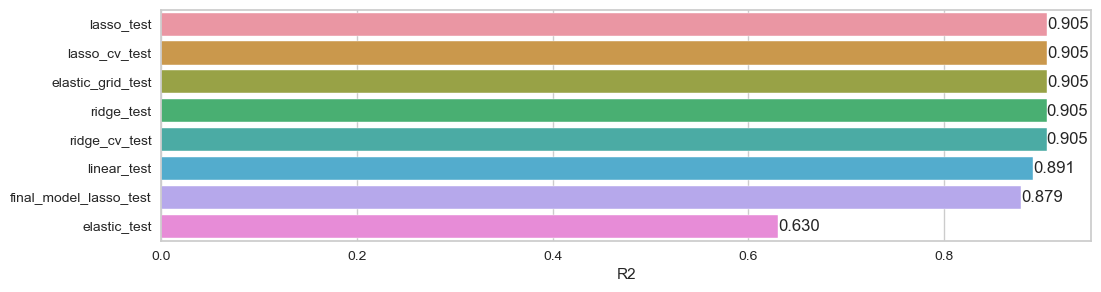

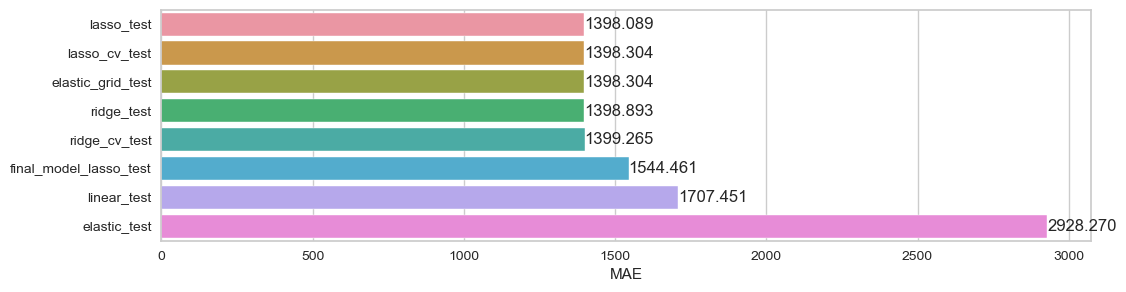

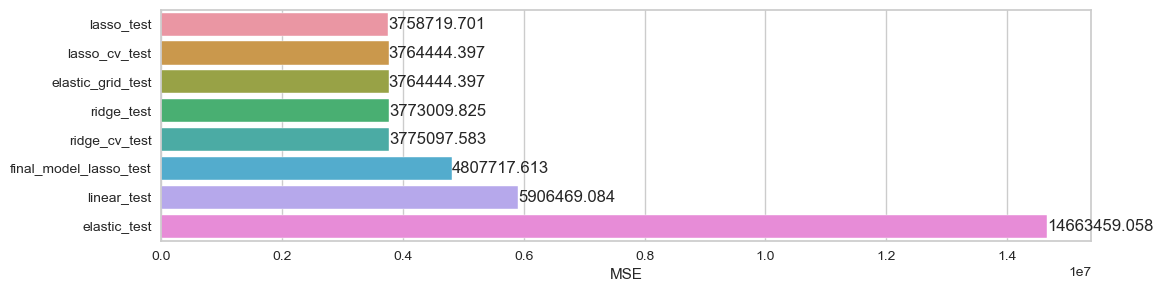

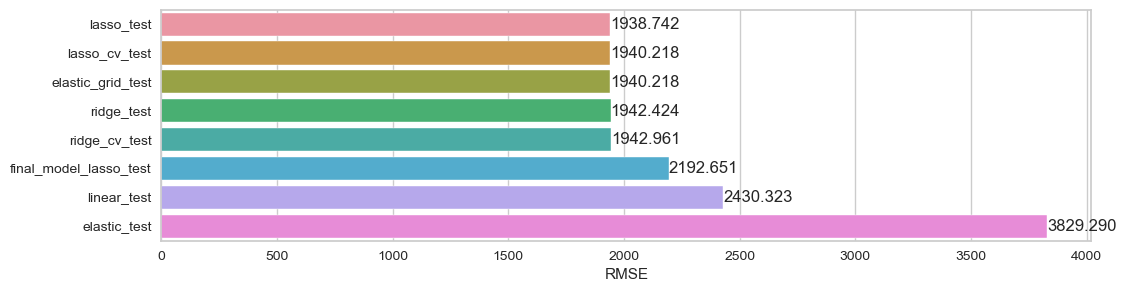

In [174]:
#metrics = scores.columns
for i, j in enumerate(scores):
    ascending = False if (j=="R2") else True
    compare = scores.sort_values(by=j, ascending=ascending)
    
    plt.figure(i, figsize=(12,3))
    ax = sns.barplot(x = compare[j] , y= compare.index)
    ax.bar_label(ax.containers[0], fmt="%.3f");

## Prediction new observation - `with Pipeline`

In [175]:
X = df_final.drop(columns=["price"])
y = df_final["price"]

In [176]:
cat_ohe = X.select_dtypes("object").columns.to_list()
cat_ohe

['make_model', 'gearing_type']

In [177]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_ohe),
    remainder=MinMaxScaler()
)

In [178]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso

pipe_model = Pipeline(steps=[ 
    ("OneHotEncoder", column_trans), 
    ("Lasso", Lasso(alpha=0.01, random_state=random_state))
])
pipe_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model',
                                                   'gearing_type'])])),
                ('Lasso', Lasso(alpha=0.01, random_state=101))])

In [179]:
df_final.mean()

hp_kw          86.082828
km          33792.312789
age             1.479060
gears           5.858286
weight_kg    1338.558520
price       17145.783261
dtype: float64

In [180]:
df_final.median()

hp_kw          85.000000
km          22462.000000
age             1.000000
gears           6.000000
weight_kg    1278.000000
price       16445.000000
dtype: float64

In [181]:
df_final.mode().T

,0
make_model,Audi A3
hp_kw,85.000000
km,10.000000
age,1.000000
gearing_type,Manual
gears,6.000000
weight_kg,1163.000000
price,14990


In [182]:
my_dict = {
    "make_model": 'Audi A3',
    "hp_kw": 85,
    "km": 10,
    "age": 1,
    "gearing_type": "Manual",
    "gears": 6,
    "weight_kg": 1163,
}

In [183]:
new_obs = pd.DataFrame([my_dict])
new_obs

,make_model,hp_kw,km,age,gearing_type,gears,weight_kg
0,Audi A3,85,10,1,Manual,6,1163


In [184]:
pipe_model.predict(new_obs)

array([21432.74051885])

# Final Model With Pipeline

In [188]:
X = df_final.drop(columns=["price"])
y = df_final[["price"]]

In [189]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat_ohe),
    remainder=MinMaxScaler()
)
final_model = Pipeline(steps=[
    ("OneHotEncoder", column_trans), 
    ("Lasso", Lasso(alpha=0.01, random_state=random_state))
])
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model',
                                                   'gearing_type'])])),
                ('Lasso', Lasso(alpha=0.01, random_state=101))])

In [190]:
eval_metric_regression(final_model, X, y, X, y, "final_model_lasso")

0          final_model_lasso                       
     final_model_lasso_train final_model_lasso_test
R2                  0.885178               0.885178
MAE              1506.567773            1506.567773
MSE           4494553.063466         4494553.063466
RMSE             2120.036100            2120.036100

In [191]:
final_model.predict(new_obs)

array([21432.74051885])

## Cross Validate With Pipeline

In [195]:
model = Pipeline(steps=[
    ("OneHotEncoder", column_trans), 
    ("Lasso", Lasso(alpha=0.01, random_state=random_state))
])
scores = cross_validate(
    model, X, y,
    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
    return_train_score=True,
    cv= 20
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.iloc[:, 2:].mean()

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.304251,0.016347,0.613975,0.886789,-1215.050552,-1525.567228,-2523342.535799,-4603584.491781,-1588.503238,-2145.596535
1,0.040988,0.015001,0.527166,0.887686,-1383.429684,-1522.527355,-2968560.538230,-4590620.977236,-1722.951113,-2142.573447
2,0.292952,0.014612,0.669922,0.885104,-1758.019818,-1497.894449,-5173397.888335,-4504859.151938,-2274.510472,-2122.465348
3,0.291746,0.014997,0.601054,0.887608,-1426.259219,-1509.350056,-3035704.861494,-4579964.218100,-1742.327427,-2140.085096
4,0.043728,0.014122,0.734834,0.886773,-1421.040161,-1514.870985,-3850583.891705,-4550545.941059,-1962.290471,-2133.200867
5,0.298204,0.014027,0.614532,0.885243,-1015.599912,-1535.716866,-1763839.008381,-4641946.319395,-1328.096009,-2154.517654
6,0.298940,0.015194,0.652745,0.879265,-1081.016644,-1528.574836,-1915504.742140,-4637987.273410,-1384.017609,-2153.598680
7,0.294749,0.011999,0.907300,0.884238,-1274.140510,-1519.305002,-2751889.225033,-4588327.396657,-1658.881920,-2142.038141
8,0.302624,0.014006,0.760264,0.883636,-1159.698323,-1530.102857,-2208096.480136,-4619224.427415,-1485.966514,-2149.238104
9,0.297958,0.013713,0.783372,0.886100,-988.735346,-1539.171374,-1856648.530862,-4638384.633982,-1362.588908,-2153.690933


test_r2                                    0.570840
train_r2                                   0.885604
test_neg_mean_absolute_error           -1734.489192
train_neg_mean_absolute_error          -1502.774154
test_neg_mean_squared_error         -6044334.747169
train_neg_mean_squared_error        -4466748.466936
test_neg_root_mean_squared_error       -2213.264955
train_neg_root_mean_squared_error      -2112.375208
dtype: float64

# Model Deployment

## Save Model

In [196]:
df_final.to_csv('final_scout.csv', index=False)

In [197]:
import pickle
pickle.dump(final_model, open("final_model_scout", 'wb'))

## Use saved Model

In [198]:
import pickle
model = pickle.load(open("final_model_scout", "rb"))

In [199]:
model

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model',
                                                   'gearing_type'])])),
                ('Lasso', Lasso(alpha=0.01, random_state=101))])

## **`Result:________`**

<a id="10"></a>

<p style="background-color:romance; color:plum; font-size:275%; text-align:center; border-radius:10px 10px; font-family:newtimeroman; line-height:1.4; font-weight:bold; text-transform: title;">The End of the Project</p>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY" style="display:block; margin:auto;"></p>

<p style="background-color:romance; color:plum; font-size:165%; text-align:center; border-radius:10px 10px; font-family:newtimeroman; line-height:1.4; font-weight:bold; text-transform: uppercase;">WAY TO REINVENT YOURSELF</p>